# Proyecto N°4 Acámica -  Análisis de mercado inmobiliario

### Matías Davico - BI & Analytics Consultant

* **Proyecto de fin de cursado de la carrera Data Science en Acámica**
* Se usa el mismo dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar), usado en el primer y segundo proyecto. 

Dentro de nuestro dataset, encontramos las siguientes variables:
    
<table>
<thead>
<tr>
<th>Variable</th>
<th>Descripción</th>
</tr>
</thead>
<tbody>
<tr>
<td>start_date</td>
<td>Fecha de alta del aviso.</td>
</tr>
<tr>
<td>end_date</td>
<td>Fecha de baja del aviso.</td>
</tr>
<tr>
<td>created_on</td>
<td>Fecha de alta de la primera versión del aviso.</td>
</tr>
<tr>
<td>lat</td>
<td>Latitud</td>
</tr>
<tr>
<td>lon</td>
<td>Longitud</td>
</tr>
<tr>
<td>l1</td>
<td>País</td>
</tr>
<tr>
<td>l2</td>
<td>Provincia</td>
</tr>
<tr>
<td>l3</td>
<td>Ciudad/Barrio</td>
</tr>
<tr>
<td>Rooms</td>
<td>Cantidad de ambientes.</td>
</tr>
<tr>
<td>bedrooms</td>
<td>Cantidad de dormitorios.</td>
</tr>
<tr>
<td>bathrooms</td>
<td>Cantidad de baños.</td>
</tr>
<tr>
<td>surface_total</td>
<td>Superficie total en m².</td>
</tr>
<tr>
<td>surface_covered</td>
<td>Superficie cubierta en m².</td>
</tr>
<tr>
<td>price</td>
<td>Precio publicado en el anuncio.</td>
</tr>
<tr>
<td>currency</td>
<td>Moneda del precio publicado.</td>
</tr>
<tr>
<td>title</td>
<td>Título del anuncio.</td>
</tr>
<tr>
<td>description</td>
<td>Descripción del anuncio.</td>
</tr>
<tr>
<td>property_type</td>
<td> Tipo de propiedad.</td>
</tr>
<tr>
<td>operation_type</td>
<td>Tipo de operación (Venta, Alquiler).</td>
</tr>
</tbody>
</table>

# Analisis Exploratorio de Datos

* Importanción de librerías para todo el modelo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from geopy.geocoders import Nominatim
import matplotlib.gridspec as gridspec
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import r2_score
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Cargamos el dataset
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df = pd.DataFrame(df)
print('En nuestro archivo tenemos:', df.shape[0], 'filas y', df.shape[1], 'columnas.')

En nuestro archivo tenemos: 146660 filas y 19 columnas.


In [3]:
# las primeras cinco instancias.
print(df.shape, '\n')
df.head()

(146660, 19) 



,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [4]:
# Chequeamos todas las columnas.
print(f"Columnas: {list(df.columns)}")


Columnas: ['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency', 'title', 'description', 'property_type', 'operation_type']


In [5]:
# Pequeño pantallaso sobre las variables que manejamos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [6]:
# Pequeña descripción de columnas.
df.describe().round()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.0,136701.0,146660.0,146660.0,140703.0,126133.0,125046.0,146660.0
mean,-35.0,-58.0,3.0,2.0,2.0,217.0,113.0,241221.0
std,0.0,0.0,1.0,1.0,1.0,2038.0,917.0,318519.0
min,-35.0,-180.0,1.0,0.0,1.0,10.0,1.0,5500.0
25%,-35.0,-59.0,2.0,1.0,1.0,52.0,47.0,111000.0
50%,-35.0,-58.0,3.0,2.0,1.0,78.0,68.0,166000.0
75%,-35.0,-58.0,4.0,3.0,2.0,140.0,108.0,265000.0
max,85.0,-58.0,35.0,15.0,14.0,193549.0,126062.0,32434232.0


* Hay datos nulos, ya nos vamos a ocupar
* Mucha disparidad en todas las columnas.

* Conteo de cantidad de propiedades publicadas por primera vez en cada mes. Ademas nos ayuda ver en que periodo de tiempo estamos trabajando

In [7]:
# Conteo por mes.
copia = df.copy()
copia.created_on = pd.to_datetime(copia["created_on"])
copia["created_on"] = copia["created_on"].dt.to_period(freq = "M")
conteo_mes = copia.groupby("created_on").size()
print(conteo_mes)

created_on
2019-01     8325
2019-02     8839
2019-03    10283
2019-04     9483
2019-05     9335
2019-06     9832
2019-07    17194
2019-08    11411
2019-09     7098
2019-10    10371
2019-11    21306
2019-12     9172
2020-01    14011
Freq: M, dtype: int64


Text(0, 0.5, 'Conteo')

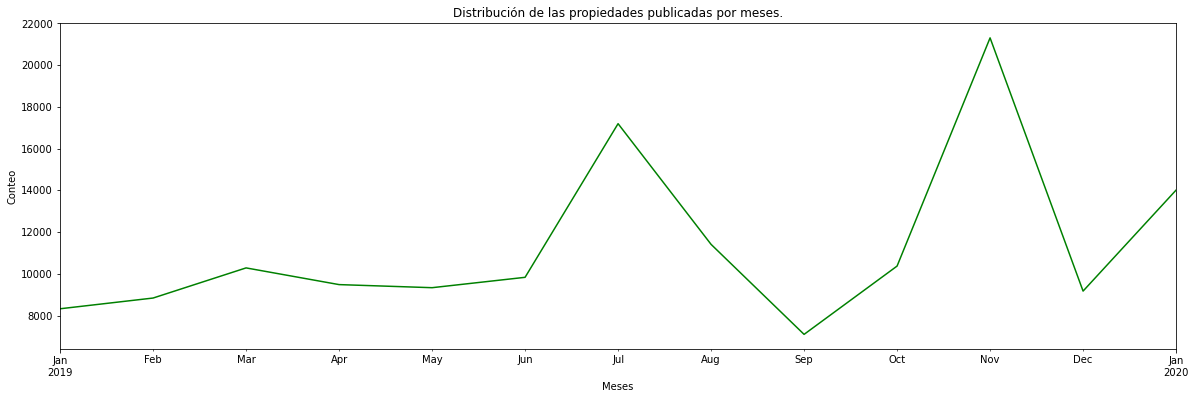

In [8]:
# Graficamente.
plt.figure(figsize = (20,6))
conteo_mes.plot(x="created_on", color="green")
plt.title("Distribución de las propiedades publicadas por meses.")
plt.xlabel("Meses")
plt.ylabel("Conteo")

In [9]:
# Como progreso el precio?
conteo_mes = copia.groupby(["created_on"])["price"].mean().round()
conteo_mes

created_on
2019-01    224020.0
2019-02    236508.0
2019-03    240776.0
2019-04    237334.0
2019-05    242967.0
2019-06    227585.0
2019-07    264978.0
2019-08    251143.0
2019-09    240754.0
2019-10    271889.0
2019-11    239675.0
2019-12    222228.0
2020-01    220864.0
Freq: M, Name: price, dtype: float64

Text(0, 0.5, 'Precio (USD)')

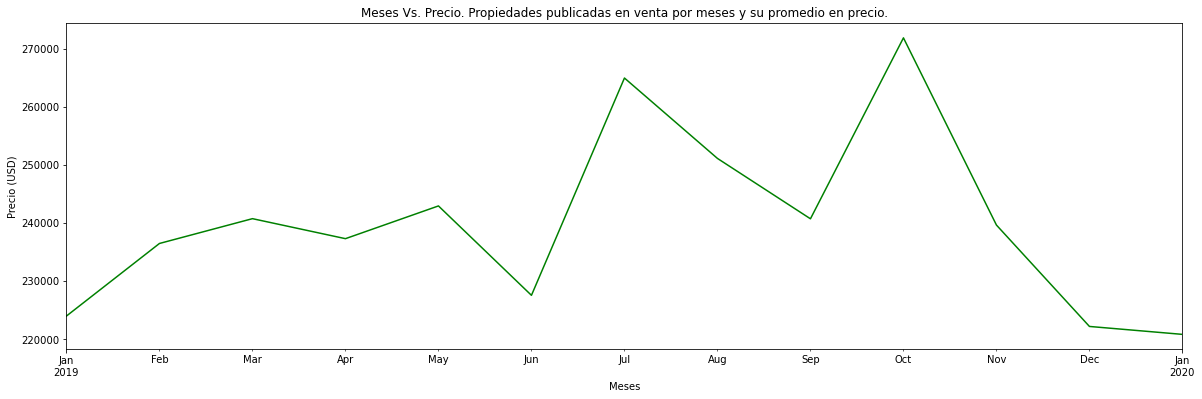

In [10]:
# Progreso gráfico del precio.
plt.figure(figsize = (20,6))
conteo_mes.plot(x="created_on",color="green")
plt.title("Meses Vs. Precio. Propiedades publicadas en venta por meses y su promedio en precio.")
plt.xlabel("Meses")
plt.ylabel("Precio (USD)")

In [11]:
# Son todas propiedades en venta? o hay algun alquiler?
list(df.operation_type.unique())

['Venta']

In [12]:
# Chequeamos en que moneda estan las propiedades.
list(df.currency.unique())

['USD']

In [13]:
# Si tenemos propiedades en otro pais.
list(df.l1.unique())

['Argentina']

* En el último gráficos vemos que hay dos picos positivos bastantes notorios. Si observamos en la gráfica anterior a esta, se va a complementar bastante ya que en el primero gráficamos en que meses publican más propiedades y en el segundo en que meses son más caras las publicaciones.
* Otra pregunta que tengo para hacerme antes de tocar el dataset es si puede haber propiedades duplicadas.

In [14]:
# Chequeamos los datos que podrían estar duplicados.
duplicatesrows = df[df.duplicated()]
print('Numero de datos duplicados: ', duplicatesrows.shape)
duplicatesrows.head(8)

Numero de datos duplicados:  (2358, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
7,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH,Venta
40,2019-10-17,2019-10-22,2019-10-17,-34.597613,-58.416688,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,USD,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento,Venta
48,2019-10-17,2019-10-27,2019-10-17,-34.597613,-58.416688,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,USD,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento,Venta
51,2019-10-17,2019-11-15,2019-10-17,-34.577746,-58.431085,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,46.0,40.0,145000.0,USD,U$S 145.000 - 2 amb en Duplex - Palermo - Char...,Charcas 5200Palermo2 ambientes en Dúplex.45.68...,Departamento,Venta
55,2019-10-17,2019-11-27,2019-10-17,-34.597613,-58.416688,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,49.0,41.0,169000.0,USD,Oportunidad - CON COCHERA !! Excelente ubicaci...,Para Visitarlo contactarse al 01161534481 Mart...,Departamento,Venta
75,2019-10-17,2019-10-22,2019-10-17,-34.573835,-58.450378,Argentina,Capital Federal,Belgrano,1.0,1.0,1.0,43.0,37.0,151500.0,USD,Precioso departamento a Estrenar con Cochera,"Original Fresco y Moderno Edificio , Ubicado c...",Departamento,Venta
77,2019-10-17,2019-10-22,2019-10-17,-34.573835,-58.450378,Argentina,Capital Federal,Belgrano,1.0,1.0,1.0,43.0,37.0,151500.0,USD,Precioso departamento a Estrenar con Cochera,"Original Fresco y Moderno Edificio , Ubicado c...",Departamento,Venta


* Serán instancias que se han duplicado y se han subido por error? o serán dos departamentos con el mismo dueño, del mismo edificio y de las mismas caracteristicas?
* Creo que son pocas instancias para que nos pueda afectar al modelo, asi que las voy a dejar ya que no esta muy claro su problema.
* Lo proximo que vamos hacer es controlar los valores nulos.

In [15]:
# Aquí veremos las diferentes columnas con las que contamos y la cantidad de datos faltantes para tener en cuenta en el futuro.
print('Los nombres de las columnas son: ')
print('\n', df.columns)
print()
miss_values_count = df.isnull().sum(min_count=1)
miss_values_count = miss_values_count[miss_values_count != 0]
print(f"Número de columnas con datos faltantes: {miss_values_count.shape[0]}")
if miss_values_count.shape[0]:
    print("Recuento de valores nulos por columna: ")
    for name, miss_vals in miss_values_count.items():
        p = miss_vals > 1
        print(f"  - A la columna '{name}' le falta{'n' if p else ''} "
              f"{miss_vals} dato{'s' if p else ''}.")

Los nombres de las columnas son: 

 Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

Número de columnas con datos faltantes: 5
Recuento de valores nulos por columna: 
  - A la columna 'lat' le faltan 9925 datos.
  - A la columna 'lon' le faltan 9959 datos.
  - A la columna 'bathrooms' le faltan 5957 datos.
  - A la columna 'surface_total' le faltan 20527 datos.
  - A la columna 'surface_covered' le faltan 21614 datos.


In [16]:
df.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

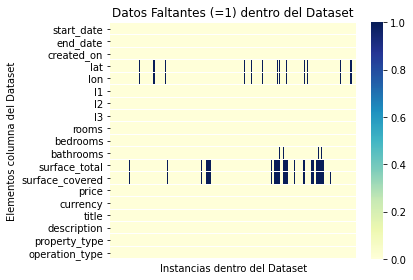

In [17]:
# Mapa de calor donde se observan la cantidad de datos faltantes.
Dat = df.isnull()
heat = sns.heatmap(Dat.T, cmap = "YlGnBu", xticklabels=False)
plt.title('Datos Faltantes (=1) dentro del Dataset')
plt.xlabel('Instancias dentro del Dataset')
plt.ylabel('Elementos columna del Dataset')
plt.tight_layout()

In [18]:
# Porcentaje de valores nulos en nuestro dataset
print('Porcentaje de instancias con valores nulos: %', (df.isnull().sum().sum()/146660) * 100)

Porcentaje de instancias con valores nulos: % 46.353470612300555


* Antes de hacer el gran filtro que debemos hacer (Capital Federal - Deptos, PHs, Casas), vamos a considerar todo el dataset para hacer la imputación de valores faltantes.

In [19]:
# Escalador
scaler = StandardScaler()
df[["lat","lon","surface_covered","surface_total", "bathrooms"]] = scaler.fit_transform(df[["lat","lon","surface_covered","surface_total", "bathrooms"]])

In [20]:
df.head(2)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-0.002100,0.165275,Argentina,Capital Federal,San Cristobal,7.0,7.0,0.449788,-0.037727,0.029647,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-0.040901,0.109409,Argentina,Capital Federal,Boedo,2.0,1.0,0.449788,-0.072081,-0.059789,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta


* Método de relleno de valores nulos: KNN IMPUTER. Elegí este por las columnas lat y lon donde voy a necesitar los vecinos más cercanos para que se logren encontrar en un lugar semejante.


In [21]:
# Relleno de valores nulos por KNN Imputer.
variable = df[["lat","lon","surface_covered","surface_total", "bathrooms"]]
imputer = KNNImputer(n_neighbors=2,
    weights='uniform',
    metric='nan_euclidean')
variable = imputer.fit_transform(variable)
df.loc[:, ["lat","lon","surface_covered","surface_total", "bathrooms"]] = variable

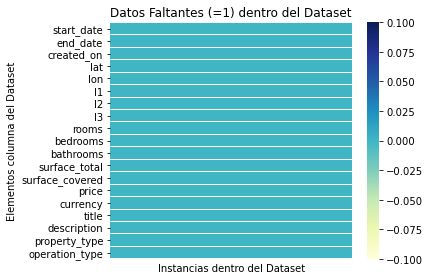

In [22]:
# Mapa de calor donde se observan la cantidad de datos faltantes.
Dat = df.isnull()
heat = sns.heatmap(Dat.T, cmap = "YlGnBu", xticklabels=False)
plt.title('Datos Faltantes (=1) dentro del Dataset')
plt.xlabel('Instancias dentro del Dataset')
plt.ylabel('Elementos columna del Dataset')
plt.tight_layout()

In [23]:
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-0.002100,0.165275,Argentina,Capital Federal,San Cristobal,7.0,7.0,0.449788,-0.037727,0.029647,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-0.040901,0.109409,Argentina,Capital Federal,Boedo,2.0,1.0,0.449788,-0.072081,-0.059789,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,0.024182,0.077809,Argentina,Capital Federal,Palermo,2.0,1.0,-0.674666,-0.084351,-0.073968,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,0.050386,0.058721,Argentina,Capital Federal,Palermo,2.0,1.0,-0.674666,-0.064720,-0.068515,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-0.660290,1.084116,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,-0.674666,-0.081897,-0.084875,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [24]:
# Desescalador
df[["lat","lon","surface_covered","surface_total", "bathrooms"]] = scaler.inverse_transform(df[["lat",
                                                                                                "lon","surface_covered","surface_total", "bathrooms"]])
df.head(2)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta


In [25]:
df.describe().round()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,146660.0,146660.0,146660.0,146660.0,146660.0,146660.0,146660.0,146660.0
mean,-35.0,-58.0,3.0,2.0,2.0,362.0,174.0,241221.0
std,0.0,0.0,1.0,1.0,1.0,2333.0,1068.0,318519.0
min,-35.0,-180.0,1.0,0.0,1.0,10.0,1.0,5500.0
25%,-35.0,-59.0,2.0,1.0,1.0,52.0,46.0,111000.0
50%,-35.0,-58.0,3.0,2.0,1.0,80.0,68.0,166000.0
75%,-35.0,-58.0,4.0,3.0,2.0,146.0,110.0,265000.0
max,85.0,-58.0,35.0,15.0,14.0,193549.0,126062.0,32434232.0


<AxesSubplot:>

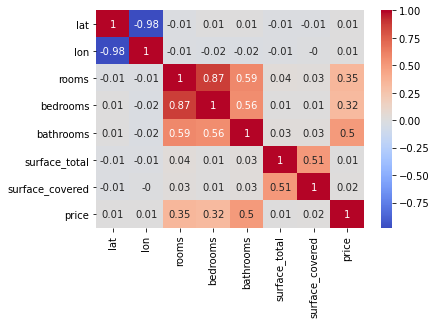

In [26]:
# Heatmap de correlaciones sin distinguir por propiedad
c= df.corr().round(2)
sns.heatmap(c,cmap='coolwarm',annot=True)

* Hay algunos valores curiosos pero vamos a recaer sobre esto más adelante. 
* Lo proximo que voy a explorar va ser los tipos de propiedades y que información podemos extraer de esto.

**Distribución de las propiedades en Buenos Aires.**
* Para mostrar las propiedades distribuidas en Buenos Aires se usará la librería **Plotly**.

In [27]:
# Mapa donde se divide por zona de Buenos Aires.
px.set_mapbox_access_token("pk.eyJ1IjoiZGF2aWthc28iLCJhIjoiY2twMGFsaW5wMGYycjJucnQ1cDAweWp6aSJ9.T2gsrMbzTDm-y0fWeq9Wzg")
fig = px.scatter_mapbox(df, lat="lat", lon="lon", color="l2",hover_name="property_type", size="price", hover_data=["price", "l3"],
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10, height=1000, center={"lat":-34.60652, "lon":-58.43557})
fig.write_html('map_figure.html', auto_open=True)

* Mientras más cara, más grande su burbuja.

In [28]:
fig = px.scatter_mapbox(df, lat="lat", lon="lon", hover_name="property_type", hover_data=["price", "l3"],
                        color_discrete_sequence=["blue"], zoom=8, height=1000, center={"lat":-34.60652, "lon":-58.43557})
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html('map_figure1.html', auto_open=True)

* Encontramos outliers en Cordoba y Rosario por ejemplo, donde su latitud y longitud la ubican en estas provincias pero estan categorizadas erroneamente como BS AS Zona Oeste o Zona Este.

**Continuamos estudiando las propiedades de acuerdo a su precio, superficie y sus zonas.**

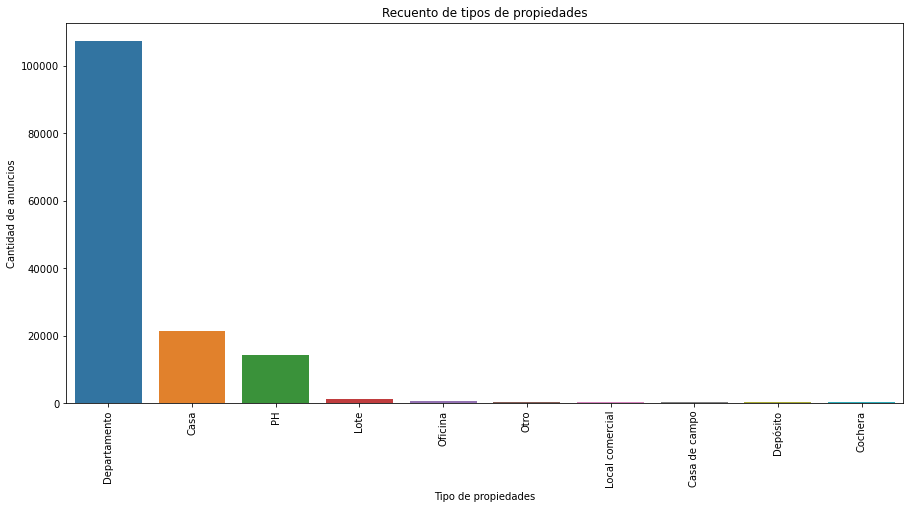

In [29]:
# Gráfico de barras donde podríamos predecir a que tipo de propiedad se dedica la inmobiliaria o lo que más tiene disponible en ese momento.
plt.figure(figsize=(15,7))
sns.countplot(data = df, x = 'property_type', order = df['property_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Recuento de tipos de propiedades')
plt.xlabel('Tipo de propiedades')
plt.ylabel('Cantidad de anuncios')
plt.show()

In [30]:
 # Recuento de cada tipo de propiedad.
print('Los diferentes tipos de propiedades con los que contamos son: ')
print('   -  ',df["property_type"].unique(),'\n')
print('En total tenemos', len(df.property_type.unique()), 'tipos de propiedades. \n ')
print('Tipo de prop. |  Cant de propiedades\n')
print(df["property_type"].value_counts(),'\n')

Los diferentes tipos de propiedades con los que contamos son: 
   -   ['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito'] 

En total tenemos 10 tipos de propiedades. 
 
Tipo de prop. |  Cant de propiedades

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64 



Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64 



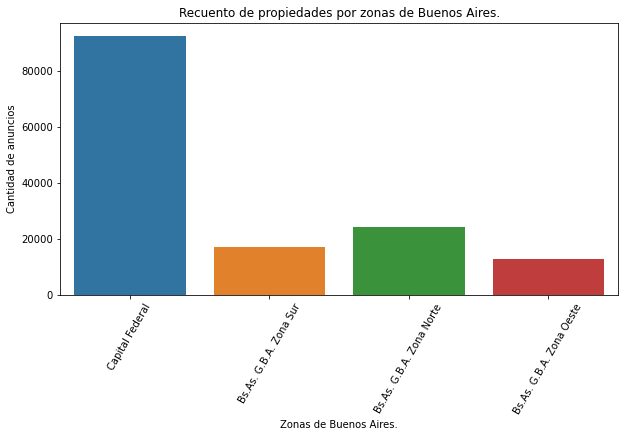

In [31]:
# Gráfico comparativo entre las propiedades y sus zonas.
print(df["l2"].value_counts(),'\n')
plt.figure(figsize = (10,5))
gr = sns.countplot(data = df, x = "l2")
plt.xticks(rotation=60)
plt.title('Recuento de propiedades por zonas de Buenos Aires.')
plt.xlabel('Zonas de Buenos Aires.')
plt.ylabel('Cantidad de anuncios')
plt.show()

Promedio de precio por zona:

l2
Bs.As. G.B.A. Zona Norte    241528.79
Bs.As. G.B.A. Zona Oeste    156328.92
Bs.As. G.B.A. Zona Sur      195350.77
Capital Federal             261272.12
Name: price, dtype: float64


<Figure size 2160x576 with 0 Axes>

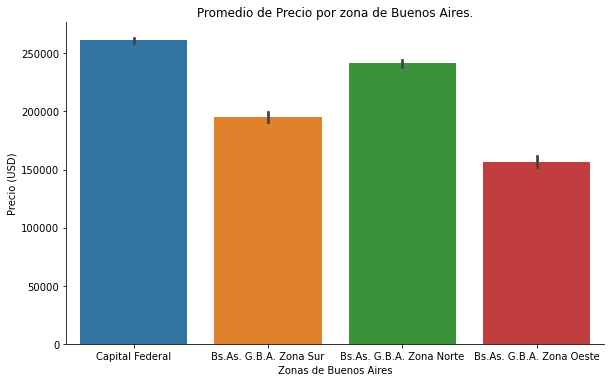

In [32]:
# Promedio del valor de la propiedad por zona.
print('Promedio de precio por zona:\n')
print(df.groupby('l2')['price'].mean().round(2))

# Grafico para observar el promedio del valor por zona.
plt.figure(figsize = (30,8))
graf1 = sns.catplot(data = df, x = 'l2', y = 'price', kind = 'bar')
graf1.fig.set_figwidth(10)
plt.title('Promedio de Precio por zona de Buenos Aires.')
plt.xlabel('Zonas de Buenos Aires')
plt.ylabel('Precio (USD)')
plt.show()


Promedio de superficie del terreno por zona:

l2
Bs.As. G.B.A. Zona Norte    480.90
Bs.As. G.B.A. Zona Oeste    671.14
Bs.As. G.B.A. Zona Sur      797.26
Capital Federal             208.35
Name: surface_total, dtype: float64


<Figure size 2160x576 with 0 Axes>

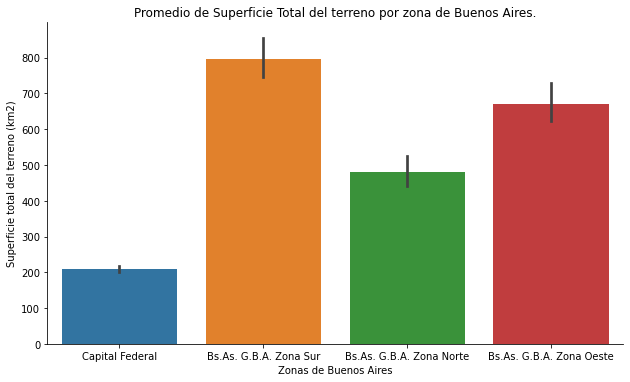

In [33]:
# Promedio del superficie total de la propiedad por zona.
print('Promedio de superficie del terreno por zona:\n')
print(df.groupby('l2')['surface_total'].mean().round(2))
# Grafico para observar el promedio de la superficie total por zona.
plt.figure(figsize = (30,8))
graf2 = sns.catplot(data = df, x = 'l2', y = 'surface_total', kind = 'bar')
graf2.fig.set_figwidth(10)
plt.title('Promedio de Superficie Total del terreno por zona de Buenos Aires.')
plt.xlabel('Zonas de Buenos Aires')
plt.ylabel('Superficie total del terreno (km2)')
plt.show()


* Como se puede ver, en Capital Federal tenemos el más bajo promedio en cuestiones de superficie, lo cual es lógico ya que la mayoría deben ser departamentos pero a su vez es la zona más cara junto a Zona Norte donde deben estar la mayoría de los barrios cerrados.

In [34]:
# Promedio del valor por tipo de propiedad.
print('Promedio del valor de la propiedad por tipo de propiedad:\n')
df.groupby('property_type')['price'].mean().round(2)

Promedio del valor de la propiedad por tipo de propiedad:



property_type
Casa               275932.85
Casa de campo      212242.83
Cochera             24255.98
Departamento       236746.74
Depósito           885932.08
Local comercial    449184.06
Lote               386830.37
Oficina            183674.57
Otro               671686.70
PH                 188493.52
Name: price, dtype: float64

In [35]:
# Promedio de superficie totalpor tipo de propiedad.
print('Promedio de la superficie total de la propiedad por tipo de propiedad:\n')
df.groupby('property_type')['surface_total'].mean().round(2)

Promedio de la superficie total de la propiedad por tipo de propiedad:



property_type
Casa                780.65
Casa de campo      3368.17
Cochera             270.11
Departamento        256.05
Depósito            569.63
Local comercial     705.44
Lote               1824.03
Oficina             292.08
Otro               5323.06
PH                  192.88
Name: surface_total, dtype: float64

In [36]:
# Los barrios en los que opera y sus disponibilidad en cada uno.
print('Tenemos estos', len(df.l3.unique()), 'barrios diferentes: \n ')
print(df["l3"].unique(),'\n')
print('Los primeros 40 en disponibilidad:\n')
print(df["l3"].value_counts().nlargest(40),'\n')


Tenemos estos 89 barrios diferentes: 
 
['San Cristobal' 'Boedo' 'Palermo' 'La Plata' 'Villa Crespo'
 'Parque Patricios' 'Villa Pueyrredón' 'Pilar' 'Tigre' 'Abasto' 'Flores'
 'Morón' 'Nuñez' 'Almagro' 'Belgrano' 'Floresta' 'Recoleta' 'Balvanera'
 'Caballito' 'Chacarita' 'San Telmo' 'Colegiales' 'La Matanza'
 'San Isidro' 'San Miguel' 'Villa Luro' 'Barrio Norte' 'Las Cañitas'
 'San Nicolás' 'Villa Urquiza' 'Vicente López' 'Parque Centenario'
 'General San Martín' 'Villa General Mitre' 'Lanús' 'Ituzaingó' 'Boca'
 'Once' 'Retiro' 'Monserrat' 'Avellaneda' 'San Fernando' 'Puerto Madero'
 'Villa Ortuzar' 'Parque Chacabuco' 'Centro / Microcentro'
 'Tres de Febrero' 'Liniers' 'Coghlan' 'Congreso' 'Paternal' 'Saavedra'
 'Villa Santa Rita' 'Barracas' 'Villa Lugano' 'Constitución' 'Mataderos'
 'Villa Devoto' 'Parque Avellaneda' 'Villa del Parque'
 'Esteban Echeverría' 'Lomas de Zamora' 'Almirante Brown' 'Ezeiza'
 'San Vicente' 'Berazategui' 'Quilmes' 'Malvinas Argentinas' 'José C Paz'
 'Escobar' 

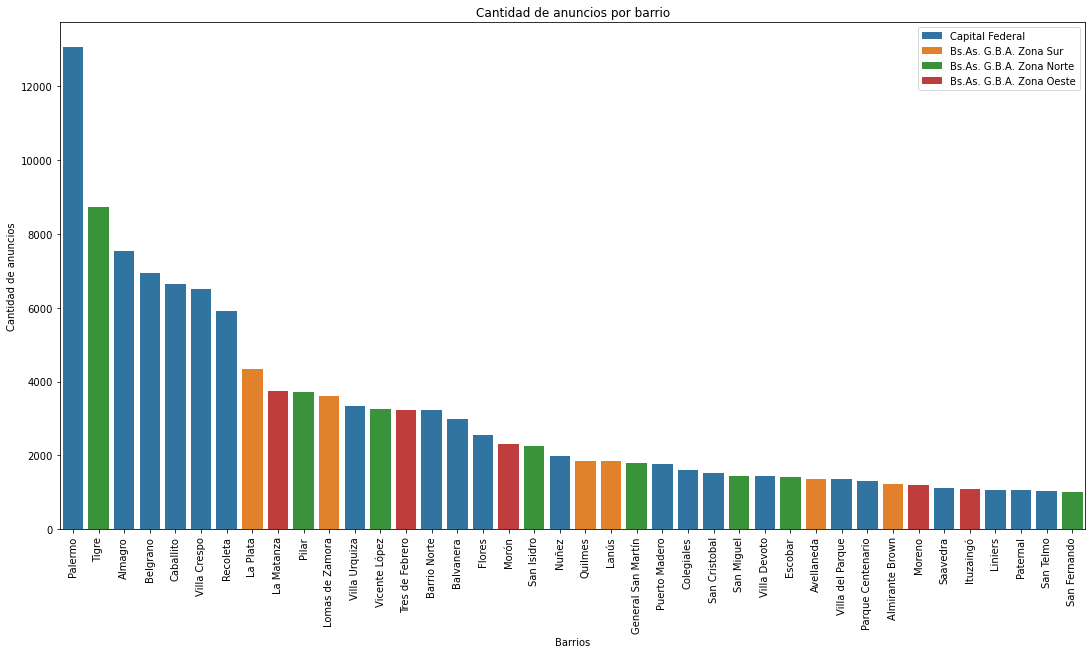

In [37]:
# Gráfico comparativo entre las propiedades, sus barrios y sus zonas.
plt.figure(figsize = (30,8))
plt.subplot(1,2,2)
sns.countplot(x = 'l3', hue = 'l2', data = df, dodge = False,
             order = df['l3'].value_counts().nlargest(40).index)
plt.title('Cantidad de anuncios por barrio')
plt.xlabel('Barrios')
plt.ylabel('Cantidad de anuncios')
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


* La mayoría de los anuncios se encuentran en Capital Federal, supongo que esto era de esperar ya que vimos que esta inmobiliaria tenía sobre todo departamentos.

In [38]:
# Barrios más caros
print('Promedio del valor de los barrios más caros: \n')

precio_barrio = df.groupby(["l2",'l3'])["price"].mean().round(0).to_frame().sort_values(by="price", ascending=False).reset_index()
precio_barrio

Promedio del valor de los barrios más caros: 



,l2,l3,price
0,Capital Federal,Puerto Madero,984679.0
1,Capital Federal,Villa Riachuelo,535988.0
2,Capital Federal,Las Cañitas,469045.0
3,Capital Federal,Recoleta,410252.0
4,Capital Federal,Belgrano,376294.0
...,...,...,...
84,Capital Federal,Boca,128428.0
85,Bs.As. G.B.A. Zona Sur,Avellaneda,127272.0
86,Capital Federal,Villa Soldati,122472.0
87,Capital Federal,Constitución,104534.0


* Tiene sentido que las propiedades más caras se encuentren en Puerto Madero, Cañitas, Recoleta, Belgrano...
* Googleando me pareció curioso que Villa Riachuelo se encuentre dentro de los 5 barrios más caros de todo Buenos Aires. En el 2018 Villa Riachuelo tuvo lugar a lo que era la Villa Olímpica, donde construyeron nuevos edificios que más tarde iban a alojar a todos los competidores del mundo que participaron de los Juegos Olímpicos de la Juventud. Una vez terminados los Juegos Olímpicos, estas propiedades fueron vendidas al público en general. Quizás en 2019, año posterior a esta competición, año del cual es el dataset que estamos estudiando, se pusieron en venta todas esas contstrucciones modernas y podría explicar esta observación.

In [39]:
# Barrios más grandes
print('Promedio de superficie total de los barrios con propiedades más grandes: \n')

superficie_barrio = df.groupby(["l2",'l3'])["surface_total"].mean().round(0).to_frame().sort_values(by="surface_total", ascending=False).reset_index()
superficie_barrio

Promedio de superficie total de los barrios con propiedades más grandes: 



,l2,l3,surface_total
0,Bs.As. G.B.A. Zona Oeste,Marcos Paz,6294.0
1,Bs.As. G.B.A. Zona Sur,Cañuelas,3875.0
2,Bs.As. G.B.A. Zona Sur,San Vicente,3173.0
3,Bs.As. G.B.A. Zona Oeste,General Rodríguez,2597.0
4,Bs.As. G.B.A. Zona Norte,San Miguel,1267.0
...,...,...,...
84,Capital Federal,Parque Centenario,106.0
85,Capital Federal,Once,103.0
86,Capital Federal,Catalinas,85.0
87,Capital Federal,Centro / Microcentro,80.0


* Tambien tiene sentido que en Zona Oeste y Zona Sur haya terrenos más grandes ya que seguramente son chacras, campos, etc..

**Comentario:** 
* Como podemos notar, la mayor disponibilidad se encuentra en CABA y en Zona Norte, más precisamente en Tigre, donde curiosamente estas dos zonas son las más caras. 
* También podemos destacar los promedios de superficie total, donde se puede observar que solo encontramos pocos barrios con grandes números. Esto demuestra, una vez más, el tipo de propiedad con lo que contamos en nuestro dataset, departamentos.
* Vemos que el ranking de valor lo lidera CABA, junto con Zona Norte, lo cual era lo esperable. Por otro lado, podemos mencionar las superficies de cada barrio liderandola Zona Sur donde seguramente tendremos más casas y casas de campo, y CABA es la menor ya que seguramente se encuentran todos los departamentos.

* Ahora generaremos la búsqueda de latitud y longitud de cada barrio en buenos aires para así plasmarlos según precio en un mapa, para esto se usará la libreria **Geopy**. Para hacer esto, lo primero que hay que hacer es poner lo más explicito posible el barrio, añadiendole el pais y provincia, de esta manera **Geopy** lo podre encontrar exactamente donde lo necesitamos.

In [40]:
precio_barrio = df.groupby(["l2",'l3'])["price"].mean().to_frame().sort_values(by="price", ascending=False).reset_index()
precio_barrio

,l2,l3,price
0,Capital Federal,Puerto Madero,984679.031303
1,Capital Federal,Villa Riachuelo,535988.071429
2,Capital Federal,Las Cañitas,469045.204056
3,Capital Federal,Recoleta,410252.230184
4,Capital Federal,Belgrano,376293.661283
...,...,...,...
84,Capital Federal,Boca,128428.273504
85,Bs.As. G.B.A. Zona Sur,Avellaneda,127272.403650
86,Capital Federal,Villa Soldati,122472.463768
87,Capital Federal,Constitución,104534.073840


In [41]:
precio_barrio['l3'] = 'Argentina, Buenos Aires, ' + precio_barrio['l3'].astype(str)
precio_barrio

,l2,l3,price
0,Capital Federal,"Argentina, Buenos Aires, Puerto Madero",984679.031303
1,Capital Federal,"Argentina, Buenos Aires, Villa Riachuelo",535988.071429
2,Capital Federal,"Argentina, Buenos Aires, Las Cañitas",469045.204056
3,Capital Federal,"Argentina, Buenos Aires, Recoleta",410252.230184
4,Capital Federal,"Argentina, Buenos Aires, Belgrano",376293.661283
...,...,...,...
84,Capital Federal,"Argentina, Buenos Aires, Boca",128428.273504
85,Bs.As. G.B.A. Zona Sur,"Argentina, Buenos Aires, Avellaneda",127272.403650
86,Capital Federal,"Argentina, Buenos Aires, Villa Soldati",122472.463768
87,Capital Federal,"Argentina, Buenos Aires, Constitución",104534.073840


In [42]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='matiasdavico5@gmail.com')
precio_barrio["location"] = precio_barrio["l3"].apply(geolocator.geocode)
precio_barrio["latitude"] = precio_barrio["l3"].apply(geolocator.geocode).apply(lambda x: (x.latitude))
precio_barrio["longitude"] = precio_barrio["l3"].apply(geolocator.geocode).apply(lambda x: (x.longitude))
precio_barrio

,l2,l3,price,location,latitude,longitude
0,Capital Federal,"Argentina, Buenos Aires, Puerto Madero",984679.031303,"(Puerto Madero, Buenos Aires, Comuna 1, Ciudad...",-34.610376,-58.362207
1,Capital Federal,"Argentina, Buenos Aires, Villa Riachuelo",535988.071429,"(Villa Riachuelo, Buenos Aires, Comuna 8, Ciud...",-34.691206,-58.471450
2,Capital Federal,"Argentina, Buenos Aires, Las Cañitas",469045.204056,"(Las Cañitas, Bahía Blanca, Partido de Bahía B...",-38.715816,-62.201140
3,Capital Federal,"Argentina, Buenos Aires, Recoleta",410252.230184,"(Recoleta, Buenos Aires, Comuna 2, Ciudad Autó...",-34.587358,-58.391570
4,Capital Federal,"Argentina, Buenos Aires, Belgrano",376293.661283,"(Belgrano, Buenos Aires, Comuna 13, Ciudad Aut...",-34.561308,-58.456545
...,...,...,...,...,...,...
84,Capital Federal,"Argentina, Buenos Aires, Boca",128428.273504,"(La Boca, Buenos Aires, Comuna 4, Ciudad Autón...",-34.633510,-58.359042
85,Bs.As. G.B.A. Zona Sur,"Argentina, Buenos Aires, Avellaneda",127272.403650,"(Avellaneda, Partido de Avellaneda, Buenos Air...",-34.664839,-58.362806
86,Capital Federal,"Argentina, Buenos Aires, Villa Soldati",122472.463768,"(Villa Soldati, Comuna 8, Ciudad Autónoma de B...",-34.666290,-58.445955
87,Capital Federal,"Argentina, Buenos Aires, Constitución",104534.073840,"(Constitución, Buenos Aires, Comuna 1, Ciudad ...",-34.624246,-58.383632


* Buscamos el centro de Buenos Aires con Geopy, para así usarlo de centro en el mapa, o alguna propiedad en la Capital Federal.

In [43]:
argloc = geolocator.geocode("Argentina, Buenos Aires, Capital Federal")
print((argloc.latitude, argloc.longitude))

(-34.6075682, -58.4370894)


In [44]:
fig = px.scatter_mapbox(precio_barrio, lat="latitude", lon="longitude", hover_name="l3", hover_data=["price"],
                        color_discrete_sequence=["blue"], zoom=10, height=1000, center={"lat":-34.60652, "lon":-58.43557})
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html('map_figure2.html', auto_open=True)

* Ahora veamoslo más en un plano del mundo con una agrupación por Zona, podemos ver en este mapa que habrán propiedades mal ubicadas pero esto se da por Geopy y porque no tenemos la latitud exacta de los barrios.

In [45]:
fig = px.scatter_geo(precio_barrio, lat="latitude", lon="longitude", color="l2",
                     hover_name="l3", size="price",
                     projection="natural earth", center={"lat":-34.60652, "lon":-58.43557})
fig.write_html('map_figure3.html', auto_open=True)

* Ahora lo voy a mostrar en un mejor mapa de buenos aires, un street view. Para esto debo usar un APK que se encuentra en el siguiente link https://www.mapbox.com/,  acá hay que crearse una cuenta y al hacerlo te entrega un token, el cual uso en la celda siguiente.

* Seguidamente, vamos a ver una agrupación por Barrio y su rango de precios

In [46]:
px.set_mapbox_access_token("pk.eyJ1IjoiZGF2aWthc28iLCJhIjoiY2twMGFsaW5wMGYycjJucnQ1cDAweWp6aSJ9.T2gsrMbzTDm-y0fWeq9Wzg")

fig = px.scatter_mapbox(precio_barrio, lat="latitude", lon="longitude", color="price",hover_name="l3", size="price",
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10, height=1000, center={"lat":-34.60652, "lon":-58.43557})
fig.write_html('map_figure4.html', auto_open=True)

* Hacemos la misma agrupación pero de esta manera veremos como estan distribuidos en las zonas. De esta manera podemos encontrar alguna clusterización por zona, y encontrar outliers o mala clasificación de las propiedades por barrio

In [47]:
px.set_mapbox_access_token("pk.eyJ1IjoiZGF2aWthc28iLCJhIjoiY2twMGFsaW5wMGYycjJucnQ1cDAweWp6aSJ9.T2gsrMbzTDm-y0fWeq9Wzg")

fig = px.scatter_mapbox(precio_barrio, lat="latitude", lon="longitude", color="l2",hover_name="l3", size="price",
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10, height=1000, center={"lat":-34.60652, "lon":-58.43557})
fig.write_html('map_figure5.html', auto_open=True)

* Ahora usaremos la latitud y longitud que nos dieron por propiedad, haremos una media de estos para tratar de tener una medida más exacta por barrio sin usar Geopy.

* Esto lo haremos para poder ver mejor la distribución de las propiedades en el mapa y propiedades sin estar bien ubicadas dentro de Buenos Aires, o las zonas descritas. También, no encontraremos los errores de Geopy en ubicar mal los barrios.

In [48]:
precio_barrio2 = df.groupby(["l2",'l3'])[["price", "lat", "lon"]].mean().sort_values(by="price", ascending=False).reset_index()
precio_barrio2

,l2,l3,price,lat,lon
0,Capital Federal,Puerto Madero,984679.031303,-34.623310,-58.381447
1,Capital Federal,Villa Riachuelo,535988.071429,-34.690387,-58.472446
2,Capital Federal,Las Cañitas,469045.204056,-34.581145,-58.430269
3,Capital Federal,Recoleta,410252.230184,-34.600307,-58.397971
4,Capital Federal,Belgrano,376293.661283,-34.572512,-58.451246
...,...,...,...,...,...
84,Capital Federal,Boca,128428.273504,-34.633358,-58.364038
85,Bs.As. G.B.A. Zona Sur,Avellaneda,127272.403650,-34.682227,-58.347952
86,Capital Federal,Villa Soldati,122472.463768,-34.662001,-58.442804
87,Capital Federal,Constitución,104534.073840,-34.625367,-58.385458


In [49]:
px.set_mapbox_access_token("pk.eyJ1IjoiZGF2aWNhc28iLCJhIjoiY2tveGUwMG82MDBlcTJvdGF4dzQwdTdqaCJ9.2g4m_xx-PwFLgmoFXWaSpg")

fig = px.scatter_mapbox(precio_barrio2, lat="lat", lon="lon", color="l2",hover_name="l3", size="price",
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10, height=1000, center={"lat":-34.60652, "lon":-58.43557})
fig.write_html('map_figure6.html', auto_open=True)


Podemos ver que Puerto Madero tiene algunas propiedades mal clasificadas, ya que su burbuja se encuentra desfasada de la realidad en el mapa. Esto podría ser por 2 cosas:

* Al momento de imputar lat y lon la mayoría de esas propiedades quedaban en Puerto Madero por lo cual no quedaron bien ubicadas.
* Al momento de enlistar las propiedades en la base de datos quedaron mal ubicadas en su latitud y longitud.

De los gráficos (mapas) anteriores podemos analizar varias cosas:

* La mayor cantidad de las propiedades se encuentran en "Capital Federal".
* Las propiedades más caras se encuentran en la "Capital Federal" especificamente en "Puerto Madero".
* Tenemos outliers que se presentan en Córdoba y Rosario.

# Transformación de Datos.

### Manejo de Outliers

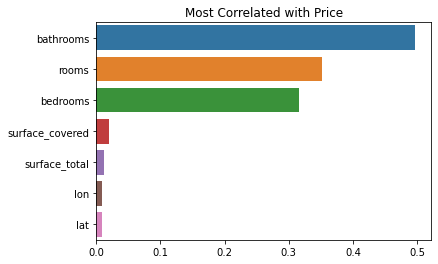

In [50]:
correlations =df.corr().abs()['price'].sort_values(ascending=False)[1:]
ax = sns.barplot(x=correlations.values,y=correlations.index).set_title('Most Correlated with Price')

* Voy a filtrar solo las columnas que necesitamos para el análisis y el modelo. Dejaré **created_on** solo para el análisis estadístico ya que vimos que pudimos crear una relación en cuanto meses-precio y propiedades publicadas.

In [51]:
df = df[['created_on','l2','l3','rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price','property_type']]
df

,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,2019-10-17,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2019-10-17,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,2019-10-17,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH
...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento
146656,2019-07-31,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento
146657,2019-07-31,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,Departamento
146658,2019-07-31,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento


In [52]:
df.describe().round(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,146660.00,146660.00,146660.00,146660.00,146660.00,146660.00
mean,3.08,1.98,1.60,362.40,173.79,241221.08
std,1.42,1.15,0.89,2332.89,1067.67,318519.46
min,1.00,0.00,1.00,10.00,1.00,5500.00
25%,2.00,1.00,1.00,52.00,46.00,111000.00
50%,3.00,2.00,1.00,80.00,68.00,166000.00
75%,4.00,3.00,2.00,146.00,110.00,265000.00
max,35.00,15.00,14.00,193549.00,126062.00,32434232.00


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   created_on       146660 non-null  object 
 1   l2               146660 non-null  object 
 2   l3               146660 non-null  object 
 3   rooms            146660 non-null  float64
 4   bedrooms         146660 non-null  float64
 5   bathrooms        146660 non-null  float64
 6   surface_total    146660 non-null  float64
 7   surface_covered  146660 non-null  float64
 8   price            146660 non-null  float64
 9   property_type    146660 non-null  object 
dtypes: float64(6), object(4)
memory usage: 11.2+ MB


* Como observamos hay varias columnas donde podemos desarrollar One-Hot-Encoding.

**Exploración de datos mejor con la libreria Pandas-Profiling.**

In [54]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, 
                        title="Pandas Profiling Report",
                        html={'style':{'full_width':True}},minimal=True)
profile

C:\Users\Matias\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


Podemos ver que hay bastantes cosas que tener en cuenta, como:

Hay propiedades con 35 ambientes, otros con 15 habitaciones y otros con 14 baños. Estos podrían ser outliers.
Del describe anterior podemos ver que:
* El 95% de los Rooms de las propiedades van hasta 6, sucesivamente su media es de 3 y su IQR es de 2.
* El 95% de los Bedrooms de las propiedades van hasta 4, sucesivamente su media es de 2 y su IQR es de 2.
* El 95% de los Bathrooms de las propiedades van hasta 3, sucesivamente su media es de 1 y su IQR es de 1.
* El 95% de los Surface_total de las propiedades van hasta 750 m2, sucesivamente su media es de 80 y su IQR es de 95.
* El 95% de los Surface_covered de las propiedades van hasta 276 m2, sucesivamente su media es de 68 y su IQR es de 64.

Hacemos un BoxPlot de los atributos Rooms, Bedrooms y Bathrooms vs precio para ver el rango del precio según el rango de estos atributos por propiedad.

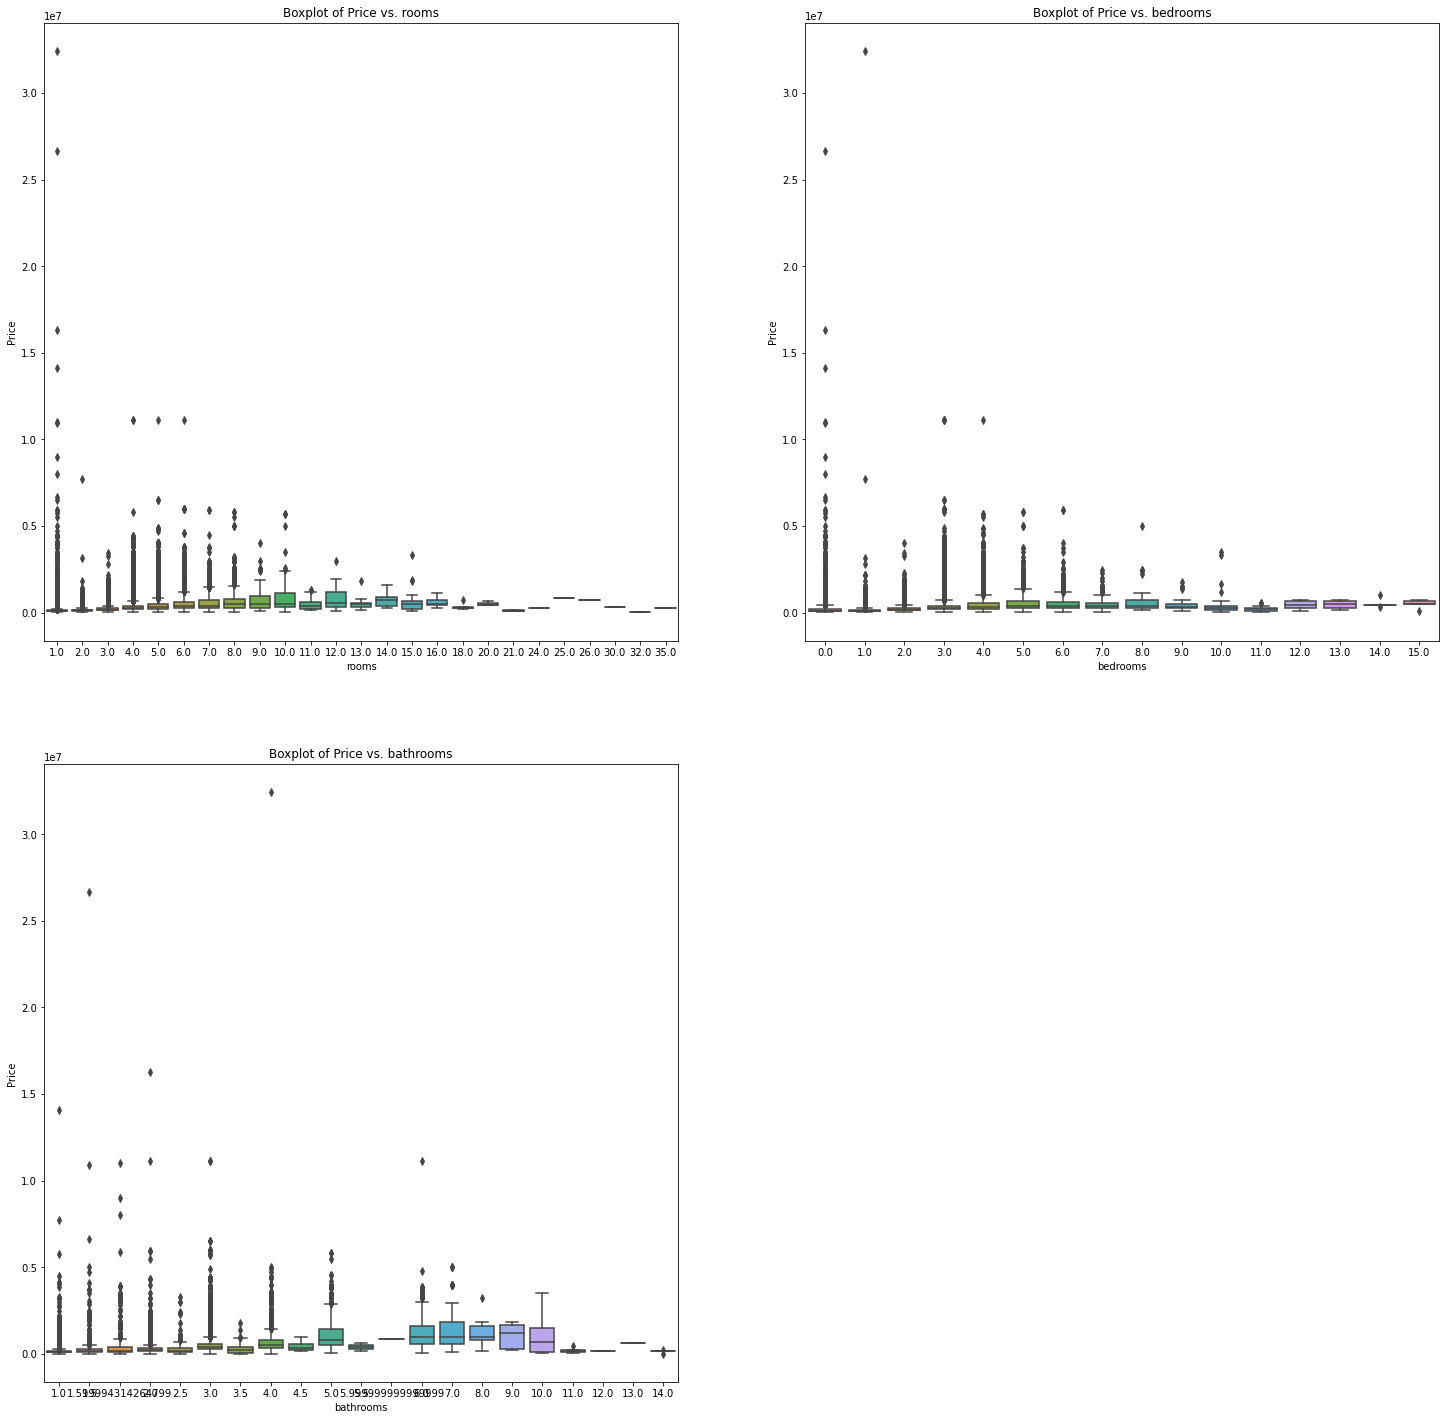

In [55]:
plt.figure(figsize=(25,25))
vars_to_plot = ['rooms', 'bedrooms', 'bathrooms']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = var, y='price', data = df)
    title_string = "Boxplot of Price vs. " + var
    plt.ylabel("Price")
    plt.title(title_string)


Valores pocos claros.

**Comentario**

* Antes de empezar nuestro manejo de outliers creo importante aclarar que en el Proyecto N°1 y N°2 se nos ha pedido crear un modelo de machine learning para predecir el precio de una propiedad usando solo los datos de CABA y que el tipo de propiedad sea Casa, Departamento o PH, asi que antes de empezar a descartar valores atípicos haremos este gran filtro.

In [56]:
# Filtro
caba_df=df[(df.l2 == 'Capital Federal') &
                    (df.property_type.isin(['Departamento','PH','Casa']))]
caba_df.head()

,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,2019-10-17,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2019-10-17,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2019-10-17,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [57]:
# Sacamos el pais y provincia para liberar nuestro dataset.
caba_df = caba_df.loc [:, ['created_on','l3','rooms', 'bedrooms','bathrooms', 'surface_total', 'surface_covered', 'price','property_type']]
caba_df

,created_on,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,2019-10-17,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2019-10-17,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2019-10-17,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2019-10-17,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2019-10-17,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,2019-07-31,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,2019-07-31,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,2019-07-31,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


Número de columnas con datos faltantes:0


<AxesSubplot:>

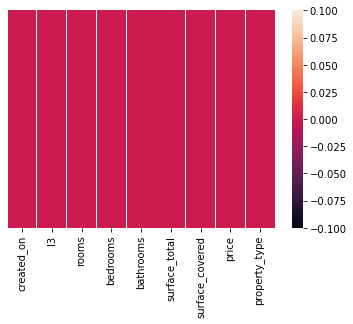

In [58]:
#Cantidad de valores faltantes por columna
miss_values_count= caba_df.isnull().sum(min_count=1)
miss_values_count=miss_values_count[miss_values_count !=0]

print(f"Número de columnas con datos faltantes:{miss_values_count.shape[0]}")
if miss_values_count.shape[0]:
        print("Recuento de valores nulos por columna: ")
        for name, miss_vals in miss_values_count.items():
            p= miss_vals > 1
            print(f"- A la columna '{name}': le falta {''if p else ''}" 
                  f"{miss_vals} dato{ 's' if p else ''}.")
sns.heatmap(caba_df.isna(), yticklabels=False) #grafica de valores faltantes por columna

In [59]:
caba_df.describe().round(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.00,91485.00,91485.00,91485.00,91485.00,91485.00
mean,2.96,1.96,1.56,207.96,137.25,259500.26
std,1.31,1.07,0.86,1403.07,913.46,322265.44
min,1.00,0.00,1.00,10.00,1.00,6000.00
25%,2.00,1.00,1.00,49.00,44.00,120000.00
50%,3.00,2.00,1.00,71.00,63.00,175000.00
75%,4.00,3.00,2.00,113.00,96.00,279000.00
max,26.00,15.00,14.00,126062.00,126062.00,32434232.00


* Claramente hay outliers ya que hay una propiedad con 14 baños, 15 piezas, y aproximadamente 126.000 m2. Son cantidades absurdas que si bien pueden existir, afectarían demasiado a nuestro modelo ya que no es nuestra intención calcular este tipo de propiedades. Tampoco queremos incorporar una propiedad tazada en 32 millones de dolares en Argentina. Muy raro. Más adelante nos ocuparemos de estos valores atípicos.

<AxesSubplot:>

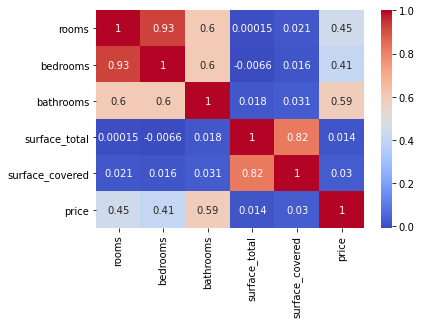

In [60]:
# Heatmap sin distinguir por propiedad
c= caba_df.corr()
sns.heatmap(c,cmap='coolwarm',annot=True)

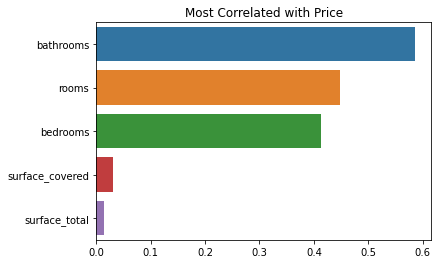

In [61]:
# Correlaciones en caba
correlations =caba_df.corr().abs()['price'].sort_values(ascending=False)[1:]
ax = sns.barplot(x=correlations.values,y=correlations.index).set_title('Most Correlated with Price')

* A esta altura quedé bastante sorprendido por la poca correlación que tiene un aspecto tan importante como la superficie total o cubierta sobre el valor de una propiedad, veremos si más adelante se vuelve más relevante o no.
* Procedemos a descartar instancias que no nos van a ser útiles en nuestro modelo, ya sea porque son valores muy altos o muy bajos, valores donde fueron causa de un mal tipeo y/o incongruencias como que la superficie cubierta sea más grande que la superficie total. Para ello vamos a hacer un analisis exploratorio en primer medida solamente de la info que tenemos en CABA para que al momento de hacer una transformación tengamos fundamentos y entendamos la necesidad de esta.

In [62]:
superficie = caba_df[caba_df.surface_total < caba_df.surface_covered]
print('Hay %s instancias con errores en la superficie.'%(superficie.shape[0]))
print('Porcentaje de instancias con valor de superficie total menor a superficie  cubierta: ','{0:.0%}'
      .format(superficie.shape[0]/caba_df.shape[0]))

Hay 1201 instancias con errores en la superficie.
Porcentaje de instancias con valor de superficie total menor a superficie  cubierta:  1%


In [63]:
caba_df.drop(caba_df[caba_df.surface_total <  caba_df.surface_covered].index, inplace = True)
caba_df.shape

(90284, 9)

In [64]:
superficie = caba_df[caba_df.surface_total < caba_df.surface_covered]
print('Hay %s instancias con errores en la superficie.'%(superficie.shape[0]))

Hay 0 instancias con errores en la superficie.


In [65]:
def boxplot_comparacion (df):
    my_pal = {"Departamento": "red", "Casa": "blue", "PH":"orange"}
    
    plt.figure (figsize = (11,22))
    gs = gridspec.GridSpec (6, 2)
    ax1 = plt.subplot (gs [0])
    sns.boxplot(data =df, x = 'surface_total',color='magenta')
    plt.title('Superficie total de las propiedades', color='green',size=15 )
    plt.xticks (rotation = 45) 
    plt.xlabel ('Superficie(m2)', color='r') 
    ax2 = plt.subplot (gs [1]) 
    sns.boxplot(data = df, x ='surface_total' , y= 'property_type',palette=my_pal)                         
    plt.title('Superficie total segun tipo de propiedad', color='green',size=15)
    plt.xlabel ('Superficie total (m2)' ,color='r') 
    plt.ylabel  ('Tipo de Propiedad',color='r')
    plt.xticks (rotation = 45) 
    ax3 = plt.subplot (gs [1,0])
    sns.boxplot(data = df, x = 'surface_covered',color='magenta')
    plt.title('Superficie cubierta de las propiedades', color='green',size=15 )
    plt.xticks (rotation = 45) 
    plt.xlabel ('Superficie(m2)', color='r') 
    ax4 = plt.subplot (gs [1,1]) 
    sns.boxplot(data = df, x ='surface_covered' , y = 'property_type',palette=my_pal)                         
    plt.title('Superficie cubierta segun tipo de propiedad', color='green',size=15)
    plt.xlabel ('Superficie cubierta (m2)' ,color='r') 
    plt.ylabel  ('Tipo de Propiedad',color='r')
    plt.xticks (rotation = 45) 
    ax5 = plt.subplot (gs [2,0])
    sns.boxplot(data =df, x = 'rooms',color='magenta')
    plt.title('Numero de Ambientes de las propiedades', color='green',size=15 )
    plt.xlim(xmin=0)
    plt.xticks (rotation = 45) 
    plt.xlabel ('Numero Ambientes', color='r')
    ax6 = plt.subplot (gs [2,1]) 
    sns.boxplot(data = df,x ='rooms' , y= 'property_type',palette=my_pal)                         
    plt.title('Numerode Ambientes segun tipo de propiedad', color='green',size=15)
    plt.xlabel ('Numero Ambientes' ,color='r') 
    plt.ylabel  ('Tipo de Propiedad',color='r')
    plt.xlim(xmin=0)
    plt.xticks (rotation = 45)
    ax7 = plt.subplot (gs [3,0])
    sns.boxplot(data = df, x = 'bedrooms',color='magenta')
    plt.title('Numero de Dormitorios de las propiedades', color='green',size=15 )
    plt.xticks (rotation = 45) 
    plt.xlabel ('Numero Dormitorios', color='r') 
    ax8 = plt.subplot (gs [3,1]) 
    sns.boxplot(data = df, x ='bedrooms' ,y = 'property_type',palette=my_pal)                         
    plt.title('Numero de Dormitorios segun tipo de propiedad', color='green',size=15)
    plt.xlabel ('Numero Dormitorios' ,color='r') 
    plt.ylabel  ('Tipo de Propiedad',color='r')
    plt.xticks (rotation = 45)
    ax9 = plt.subplot (gs [4,0])
    sns.boxplot(data =df, x = 'bathrooms',color='magenta')
    plt.title('Numero de Baños de las propiedades', color='green',size=15 )
    plt.xlim(xmin=0)
    plt.xticks (rotation = 45) 
    plt.xlabel ('Numero de Baños', color='r') 
    ax10 = plt.subplot (gs [4,1]) 
    sns.boxplot(data = df, x ='bathrooms' , y = 'property_type',palette=my_pal)                         
    plt.title('Numero de Baños segun tipo de propiedad', color='green',size=15)
    plt.xlabel ('Numero de Baños' ,color='r') 
    plt.ylabel  ('Tipo de Propiedad',color='r')
    plt.xlim(xmin=0)
    plt.xticks (rotation = 45)
    ax11 = plt.subplot (gs [5,0])
    sns.boxplot(data = df, x = 'price',color='magenta')
    plt.title('Precio de las propiedades ', color='green',size=15 )
    plt.xticks (rotation = 45) 
    plt.xlabel ('Precio(USD)', color='r') 
    ax12 = plt.subplot (gs [5,1]) 
    sns.boxplot(data = df, x ='price' , y = 'property_type',palette=my_pal)                         
    plt.title('Precio segun tipo de propiedad', color='green',size=15)
    plt.xlabel ('Precio(USD)' ,color='r') 
    plt.ylabel  ('Tipo de Propiedad',color='r')
    plt.xlim(xmin=0)
    plt.xticks (rotation = 45)
    plt.tight_layout()

Boxplots comparativos segun las distintas variables de todas las propiedades y por tipos de propiedad


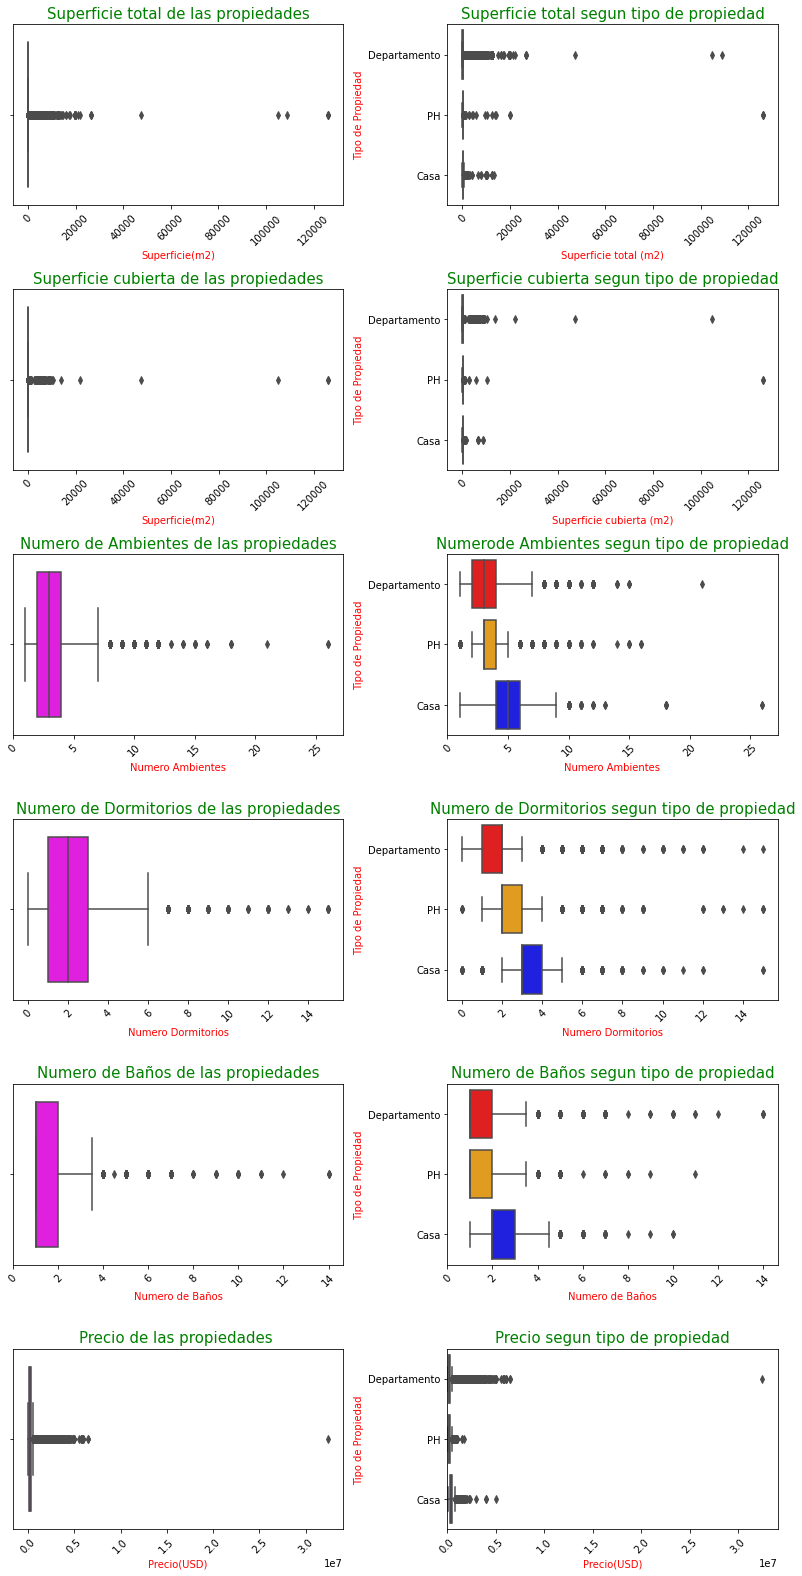

In [66]:
# Boxplot de caba de forma gráfica
print("Boxplots comparativos segun las distintas variables de todas las propiedades y por tipos de propiedad")
boxplot_comparacion(caba_df) 

* Como veniamos pensando, tenemos una gran cantidad de valores atípicos que pueden afectar nuestro modelo a la hora de tratar de predecir un precio. Dicho esto vamos a explicar como los vamos a eliminar. Suponiendo que tenemos outliers en todas las variables (columnas) vamos a crear una funcion adoptando la metodología de los cuartiles, donde los datos de cada columna que sea menor al Q1 - 1.5 IQR o mayor al Q3 + 1.5IQR de su propia columna van a ser descartados.

In [67]:
#definimos una funcion para eliminar los outliers
def remove_outlier(data,column):   
    q1,q3= np.nanpercentile(data[column],[25,75])
    iqr= q3-q1 #rango intercuartilico
    l_i= q1-1.5*iqr
    l_s=q3+1.5*iqr
    data_out = data [~((data[column]< l_i) |(data[column]> l_s))]
    return data_out

In [68]:
# Removemos
caba_df_outl=caba_df.copy()
caba_df_outl=remove_outlier(caba_df_outl,'surface_covered')
caba_df_outl=remove_outlier(caba_df_outl,'surface_total')
caba_df_outl=remove_outlier(caba_df_outl,'price')
caba_df_outl=remove_outlier(caba_df_outl,'bathrooms')
caba_df_outl=remove_outlier(caba_df_outl,'rooms')
caba_df_outl=remove_outlier(caba_df_outl,'bedrooms')
caba_df_outl.shape

(71775, 9)

Boxplots comparativos despues de realizar las transformaciones, segun las distintas variables de todas las propiedades y por tipos de propiedad


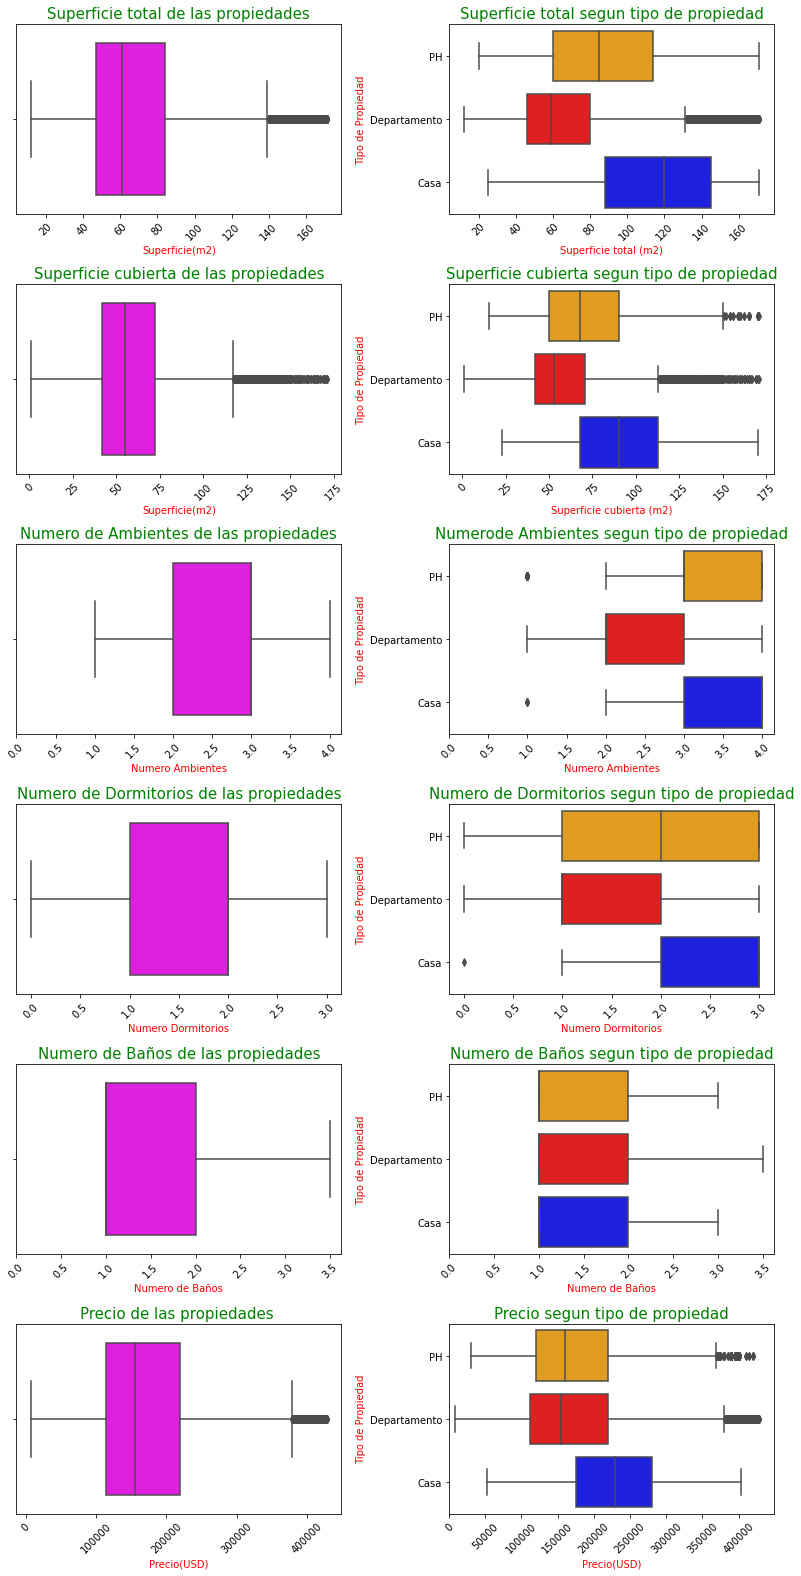

In [69]:
# Estudiamos los boxplot nuevamente
print("Boxplots comparativos despues de realizar las transformaciones, segun las distintas variables de todas las propiedades y por tipos de propiedad")
boxplot_comparacion(caba_df_outl) 

C:\Users\Matias\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

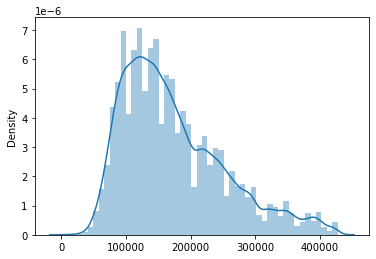

In [70]:
sns.distplot(caba_df_outl.price.values)

* Vemos que los boxplot se vuelven mucho más interpretables y podemos afirmar que manejamos un dataset con un mejor criterio con valores mucho más lógicos.

In [71]:
# Nueva descripción de nuestro conjunto de datos.
caba_df_outl.describe().round(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,71775.00,71775.00,71775.00,71775.00,71775.00,71775.00
mean,2.58,1.66,1.30,67.94,59.93,173347.21
std,0.90,0.78,0.52,28.73,24.22,79336.19
min,1.00,0.00,1.00,12.00,1.00,7500.00
25%,2.00,1.00,1.00,47.00,42.00,114000.00
50%,3.00,2.00,1.00,61.00,55.00,155000.00
75%,3.00,2.00,2.00,84.00,72.00,220000.00
max,4.00,3.00,3.50,171.00,171.00,428000.00


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.00,0.94,0.47,0.70,0.75,0.58
bedrooms,0.94,1.00,0.48,0.69,0.74,0.57
bathrooms,0.47,0.48,1.00,0.57,0.59,0.58
surface_total,0.70,0.69,0.57,1.00,0.91,0.71
surface_covered,0.75,0.74,0.59,0.91,1.00,0.72
price,0.58,0.57,0.58,0.71,0.72,1.00


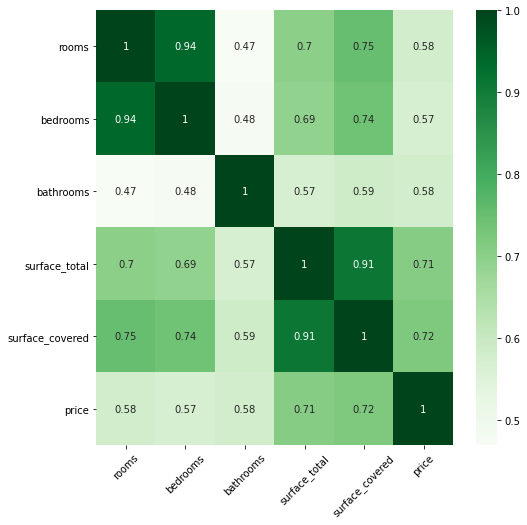

In [72]:
plt.figure (figsize = (8,8)) 
c = caba_df_outl.corr().round(2) 
sns.heatmap (c, cmap = 'Greens', annot = True) 
plt.xticks (rotation = 45) 
plt.yticks(rotation=0)
c

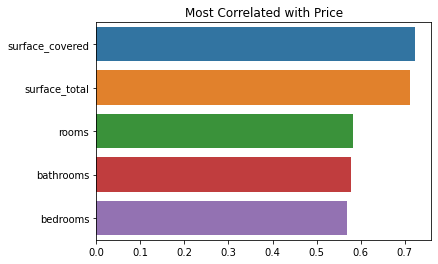

In [73]:
correlations =caba_df_outl.corr().abs()['price'].sort_values(ascending=False)[1:]
ax = sns.barplot(x=correlations.values,y=correlations.index).set_title('Most Correlated with Price')

* Vemos que mejoro exponencialmente la teoría de que la superficie cubierta y total es un gran parámetro para tratar de predecir el valor de una propiedad. Aunque todavia no podemos afirmar nada ni llegar a ninguna conclusión, creo que esta mejoría de datos es una señal de que vamos por buen camino.

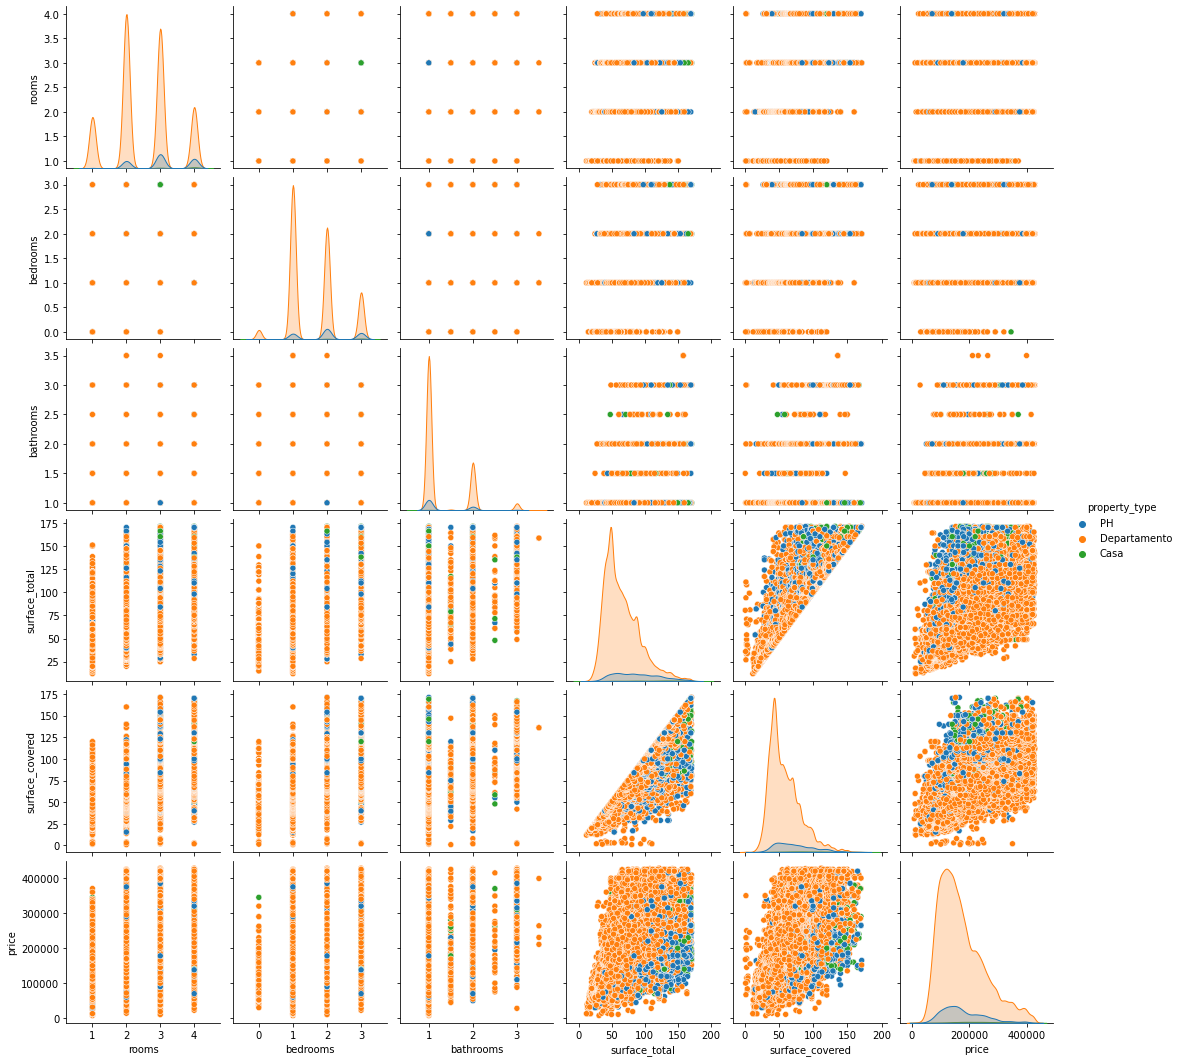

In [74]:
sns.pairplot(caba_df_outl,hue='property_type')

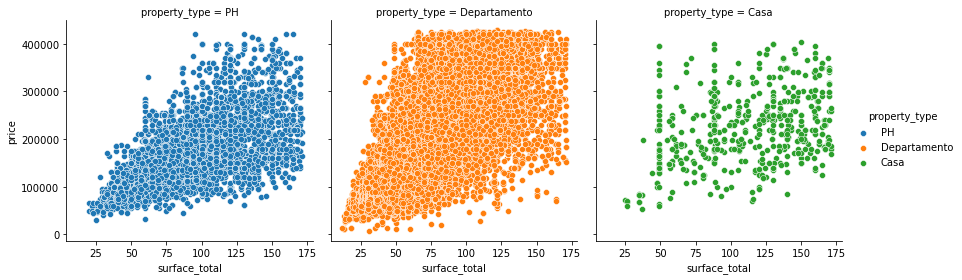

In [75]:
# Distribución por propiedad.
grid = sns.FacetGrid(caba_df_outl, col = 'property_type',hue = 'property_type',col_wrap = 3, height = 4, aspect = 1)
grid.map(sns.scatterplot, 'surface_total','price')
grid.add_legend()
plt.show()

* Podemos darnos cuenta lo que marcabamos al principio de nuestro modelo, sobre el gran predominio de Departamentos en nuestro archivo, seguido de PHs en menor medida. Por último, las Casas, que a mi parecer contamos con muy pocos datos para poder predecir el precio de las mismas.

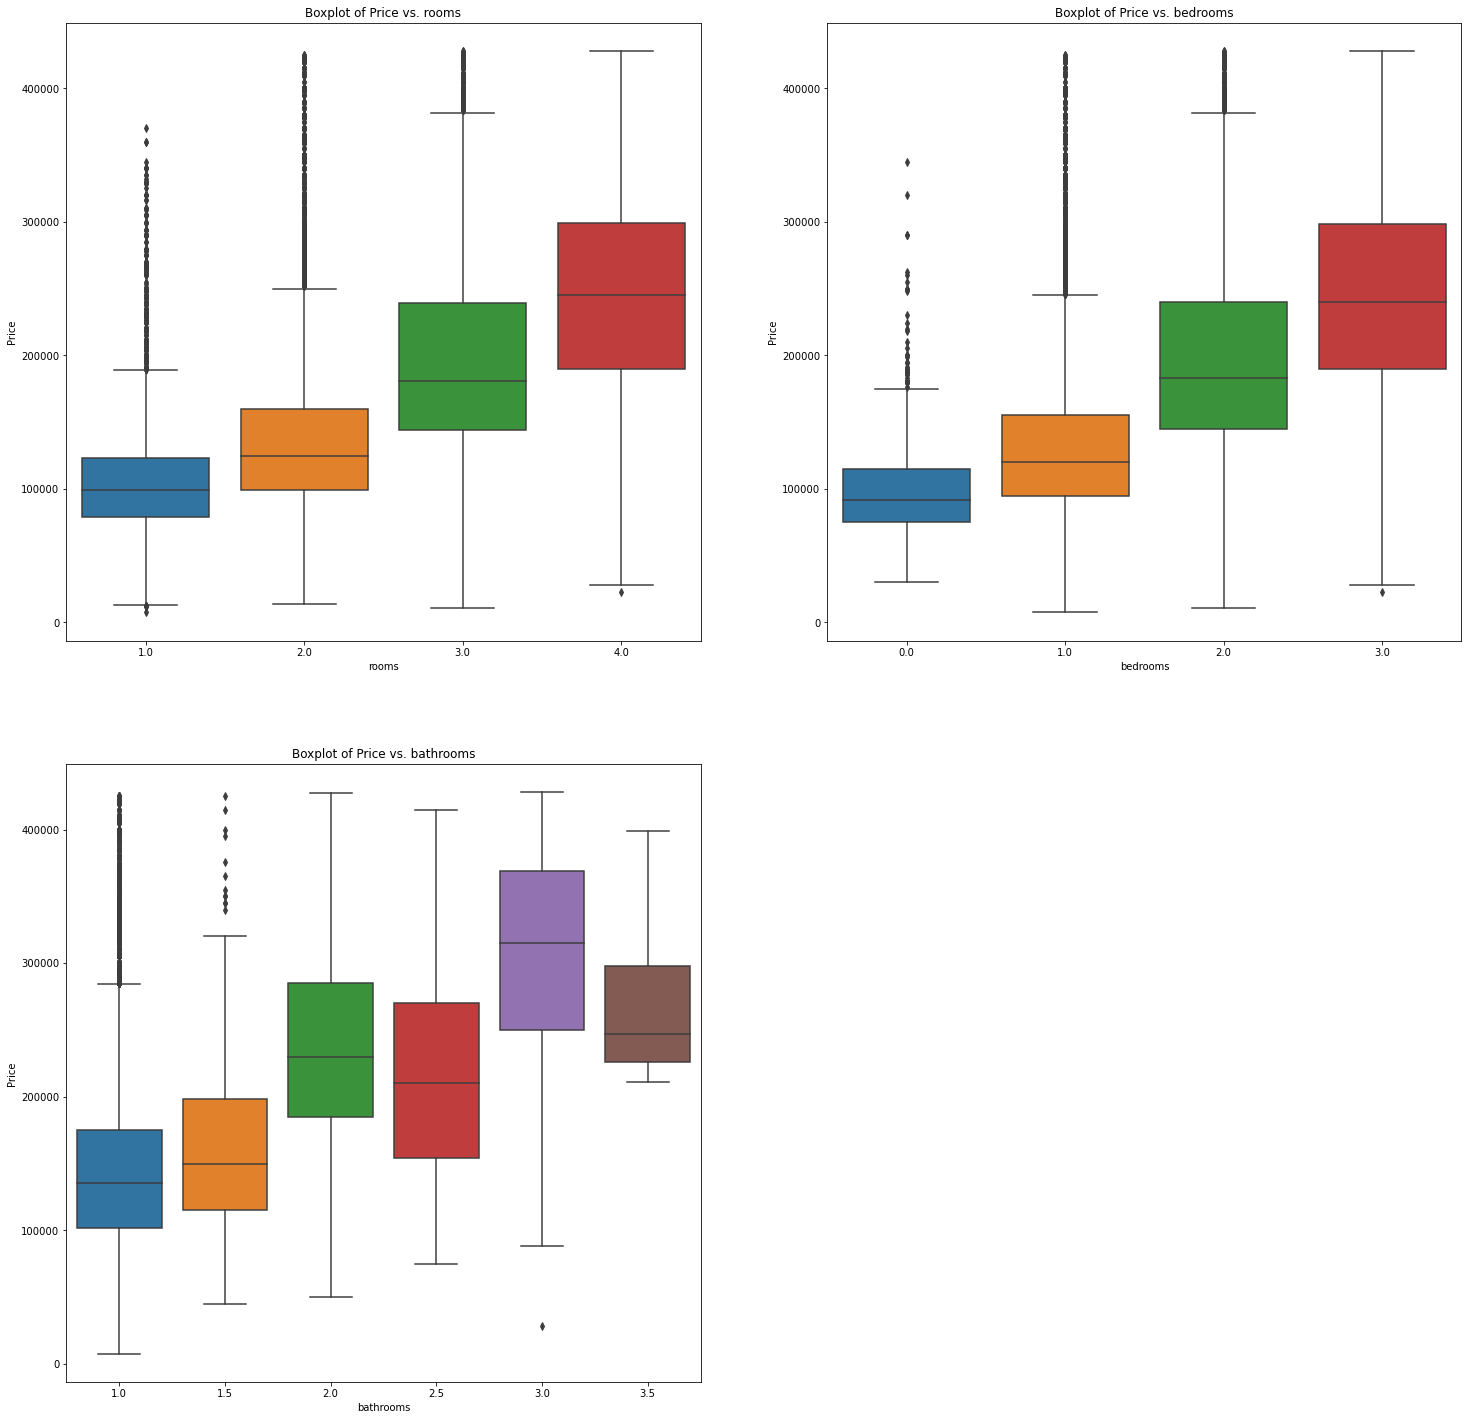

In [76]:
plt.figure(figsize=(25,25))
vars_to_plot = ['rooms', 'bedrooms', 'bathrooms']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = var, y='price', data =caba_df_outl)
    title_string = "Boxplot of Price vs. " + var
    plt.ylabel("Price")
    plt.title(title_string)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.00,0.93,0.28,0.48,0.48,0.42
bedrooms,0.93,1.00,0.30,0.44,0.46,0.42
bathrooms,0.28,0.30,1.00,0.26,0.32,0.32
surface_total,0.48,0.44,0.26,1.00,0.85,0.34
surface_covered,0.48,0.46,0.32,0.85,1.00,0.36
price,0.42,0.42,0.32,0.34,0.36,1.00


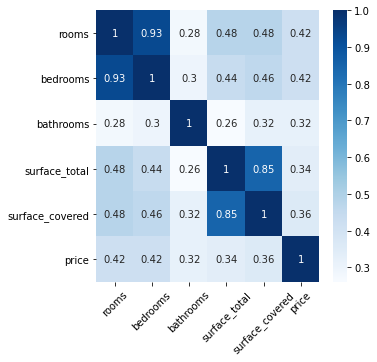

In [77]:
# Casas
plt.figure (figsize = (5,5)) 
c_casa = caba_df_outl.loc[ caba_df_outl['property_type']=='Casa'].corr().round(2)
sns.heatmap (c_casa, cmap = 'Blues', annot = True)
plt.xticks (rotation = 45) 
plt.yticks(rotation=0)
c_casa

<AxesSubplot:xlabel='price', ylabel='Count'>

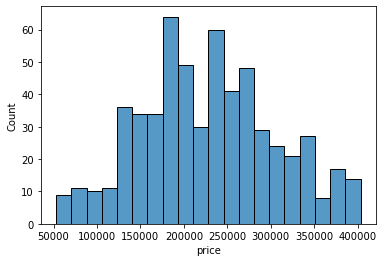

In [78]:
casas = caba_df_outl['property_type'] == 'Casa'
casa = caba_df_outl[casas]
sns.histplot(data = casa, x = 'price', bins = 20)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.00,0.94,0.37,0.60,0.67,0.56
bedrooms,0.94,1.00,0.37,0.58,0.67,0.55
bathrooms,0.37,0.37,1.00,0.43,0.51,0.48
surface_total,0.60,0.58,0.43,1.00,0.80,0.63
surface_covered,0.67,0.67,0.51,0.80,1.00,0.70
price,0.56,0.55,0.48,0.63,0.70,1.00


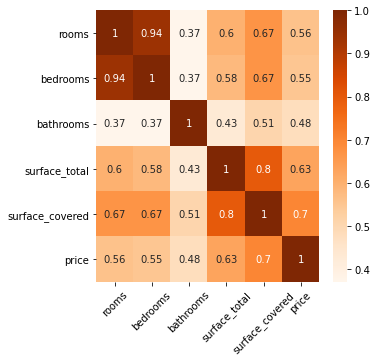

In [79]:
#  PH
plt.figure (figsize = (5,5)) 
c_ph =caba_df_outl.loc[caba_df_outl['property_type']=='PH'].corr().round(2)
sns.heatmap (c_ph, cmap = 'Oranges', annot = True)
plt.xticks (rotation = 45) 
c_ph

<AxesSubplot:xlabel='price', ylabel='Count'>

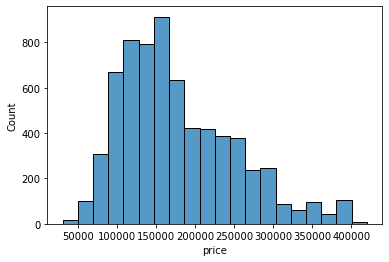

In [80]:
phs = caba_df_outl['property_type'] == 'PH'
ph = caba_df_outl[phs]
sns.histplot(data = ph, x = 'price', bins = 20)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.00,0.93,0.49,0.71,0.75,0.59
bedrooms,0.93,1.00,0.49,0.69,0.74,0.57
bathrooms,0.49,0.49,1.00,0.61,0.62,0.59
surface_total,0.71,0.69,0.61,1.00,0.93,0.75
surface_covered,0.75,0.74,0.62,0.93,1.00,0.74
price,0.59,0.57,0.59,0.75,0.74,1.00


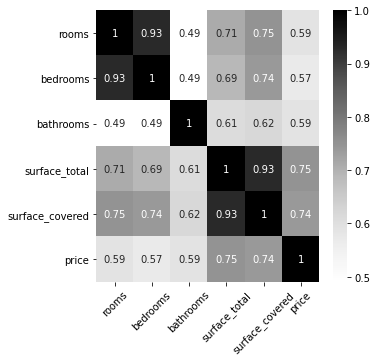

In [81]:
#Departamentos
plt.figure (figsize = (5,5)) 
c_dpto = caba_df_outl.loc[caba_df_outl['property_type']=='Departamento'].corr().round(2)
sns.heatmap (c_dpto, cmap = 'Greys', annot = True)
plt.xticks (rotation = 45) 
c_dpto

<AxesSubplot:xlabel='price', ylabel='Count'>

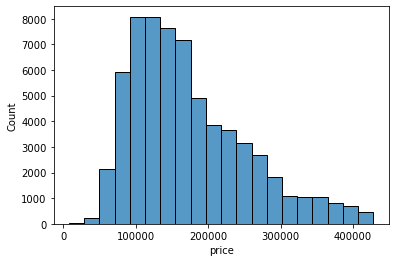

In [82]:
deptos = caba_df_outl['property_type'] == 'Departamento'
depto = caba_df_outl[deptos]
sns.histplot(data = depto, x = 'price', bins = 20)

In [83]:
print('Con outliers:', caba_df.shape[0], 'filas y', caba_df.shape[1], 'columnas.')
print('Sin outliers:', caba_df_outl.shape[0], 'filas y', caba_df_outl.shape[1], 'columnas.\n')
print('Después de eliminar propiedades con datos faltantes, columnas que no nos sirven en nuestro estudio y outliers, hemos eliminado', (caba_df.shape[0] - caba_df_outl.shape[0]), 'instancias.')

Con outliers: 90284 filas y 9 columnas.
Sin outliers: 71775 filas y 9 columnas.

Después de eliminar propiedades con datos faltantes, columnas que no nos sirven en nuestro estudio y outliers, hemos eliminado 18509 instancias.


### Encoding

**Label Encoding**

* Para el **Label Encoding** usaré las variables **Rooms, Bathrooms, Bedrooms y created_on.**

In [84]:
file_caba = caba_df_outl.copy()
file_caba

,created_on,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,2019-10-17,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2019-10-17,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2019-10-17,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2019-10-17,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,2019-10-17,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH
...,...,...,...,...,...,...,...,...,...
146542,2019-07-31,Palermo,2.0,1.0,1.0,80.0,80.0,170000.0,Departamento
146543,2019-07-31,Palermo,3.0,2.0,2.0,85.0,81.0,225000.0,Departamento
146545,2019-07-31,Palermo,3.0,2.0,2.0,88.0,82.0,399000.0,Departamento
146549,2019-07-31,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,PH


In [85]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
file_caba['rooms'] = labelencoder.fit_transform(file_caba['rooms'])
file_caba['bedrooms'] = labelencoder.fit_transform(file_caba['bedrooms'])
file_caba['bathrooms'] = labelencoder.fit_transform(file_caba['bathrooms'])
file_caba['created_on'] = labelencoder.fit_transform(file_caba['created_on'])

file_caba

,created_on,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,262,Boedo,1,1,2,70.0,58.0,159000.0,PH
2,262,Palermo,1,1,0,45.0,45.0,125000.0,PH
3,262,Palermo,1,1,0,85.0,50.0,295000.0,PH
5,262,Villa Crespo,1,1,0,56.0,56.0,150000.0,PH
6,262,Villa Crespo,1,1,0,70.0,70.0,159500.0,PH
...,...,...,...,...,...,...,...,...,...
146542,203,Palermo,1,1,0,80.0,80.0,170000.0,Departamento
146543,203,Palermo,2,2,2,85.0,81.0,225000.0,Departamento
146545,203,Palermo,2,2,2,88.0,82.0,399000.0,Departamento
146549,203,Palermo,2,2,0,84.0,84.0,178000.0,PH


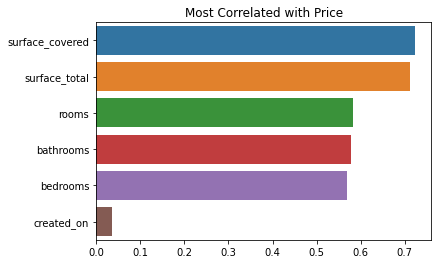

In [86]:
correlations =file_caba.corr().abs()['price'].sort_values(ascending=False)[1:]
ax = sns.barplot(x=correlations.values,y=correlations.index).set_title('Most Correlated with Price')


* Al final, la variable **created_on** no tiene mucha influencia.

### One - Hot Encoding

* Para **One - Hot Encoding** usaré los atributos **l3 y property-type**.

In [87]:
file_caba = pd.get_dummies(file_caba, columns=['l3','property_type'], prefix=["Barrio:","Propiedad:"])
file_caba

,created_on,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Barrio:_Abasto,Barrio:_Agronomía,Barrio:_Almagro,...,Barrio:_Villa Pueyrredón,Barrio:_Villa Real,Barrio:_Villa Riachuelo,Barrio:_Villa Santa Rita,Barrio:_Villa Soldati,Barrio:_Villa Urquiza,Barrio:_Villa del Parque,Propiedad:_Casa,Propiedad:_Departamento,Propiedad:_PH
1,262,1,1,2,70.0,58.0,159000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,262,1,1,0,45.0,45.0,125000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,262,1,1,0,85.0,50.0,295000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,262,1,1,0,56.0,56.0,150000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,262,1,1,0,70.0,70.0,159500.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146542,203,1,1,0,80.0,80.0,170000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
146543,203,2,2,2,85.0,81.0,225000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
146545,203,2,2,2,88.0,82.0,399000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
146549,203,2,2,0,84.0,84.0,178000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Escalador de Datos

* Uso el MinMaxScaler y no StandardScaler, ya que al momento de pasar al PCA, hacen una conversión con log lo cual daría un error porque al usar StandardScaler habrán instancias con negativos y MinMaxScaler hace un escalador de 0 - 1.

In [88]:
scaler = MinMaxScaler()
file_caba[["created_on",	"rooms",	"bedrooms",	"bathrooms",	"surface_total",	"surface_covered"]] = scaler.fit_transform(
    file_caba[["created_on",	"rooms",	"bedrooms",	"bathrooms",	"surface_total",	"surface_covered"]])
file_caba

,created_on,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Barrio:_Abasto,Barrio:_Agronomía,Barrio:_Almagro,...,Barrio:_Villa Pueyrredón,Barrio:_Villa Real,Barrio:_Villa Riachuelo,Barrio:_Villa Santa Rita,Barrio:_Villa Soldati,Barrio:_Villa Urquiza,Barrio:_Villa del Parque,Propiedad:_Casa,Propiedad:_Departamento,Propiedad:_PH
1,0.725762,0.333333,0.333333,0.4,0.364780,0.335294,159000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.725762,0.333333,0.333333,0.0,0.207547,0.258824,125000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.725762,0.333333,0.333333,0.0,0.459119,0.288235,295000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0.725762,0.333333,0.333333,0.0,0.276730,0.323529,150000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0.725762,0.333333,0.333333,0.0,0.364780,0.405882,159500.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146542,0.562327,0.333333,0.333333,0.0,0.427673,0.464706,170000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
146543,0.562327,0.666667,0.666667,0.4,0.459119,0.470588,225000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
146545,0.562327,0.666667,0.666667,0.4,0.477987,0.476471,399000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
146549,0.562327,0.666667,0.666667,0.0,0.452830,0.488235,178000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [89]:
file_caba.describe().round(2)

,created_on,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Barrio:_Abasto,Barrio:_Agronomía,Barrio:_Almagro,...,Barrio:_Villa Pueyrredón,Barrio:_Villa Real,Barrio:_Villa Riachuelo,Barrio:_Villa Santa Rita,Barrio:_Villa Soldati,Barrio:_Villa Urquiza,Barrio:_Villa del Parque,Propiedad:_Casa,Propiedad:_Departamento,Propiedad:_PH
count,71775.00,71775.00,71775.00,71775.00,71775.00,71775.00,71775.00,71775.00,71775.00,71775.00,...,71775.00,71775.00,71775.00,71775.00,71775.00,71775.00,71775.00,71775.00,71775.0,71775.00
mean,0.55,0.53,0.55,0.12,0.35,0.35,173347.21,0.01,0.00,0.09,...,0.01,0.00,0.00,0.00,0.00,0.04,0.02,0.01,0.9,0.09
std,0.28,0.30,0.26,0.21,0.18,0.14,79336.19,0.07,0.04,0.29,...,0.09,0.04,0.02,0.06,0.02,0.20,0.13,0.09,0.3,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,7500.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
25%,0.32,0.33,0.33,0.00,0.22,0.24,114000.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00
50%,0.56,0.67,0.67,0.00,0.31,0.32,155000.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00
75%,0.79,0.67,0.67,0.40,0.45,0.42,220000.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,428000.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00


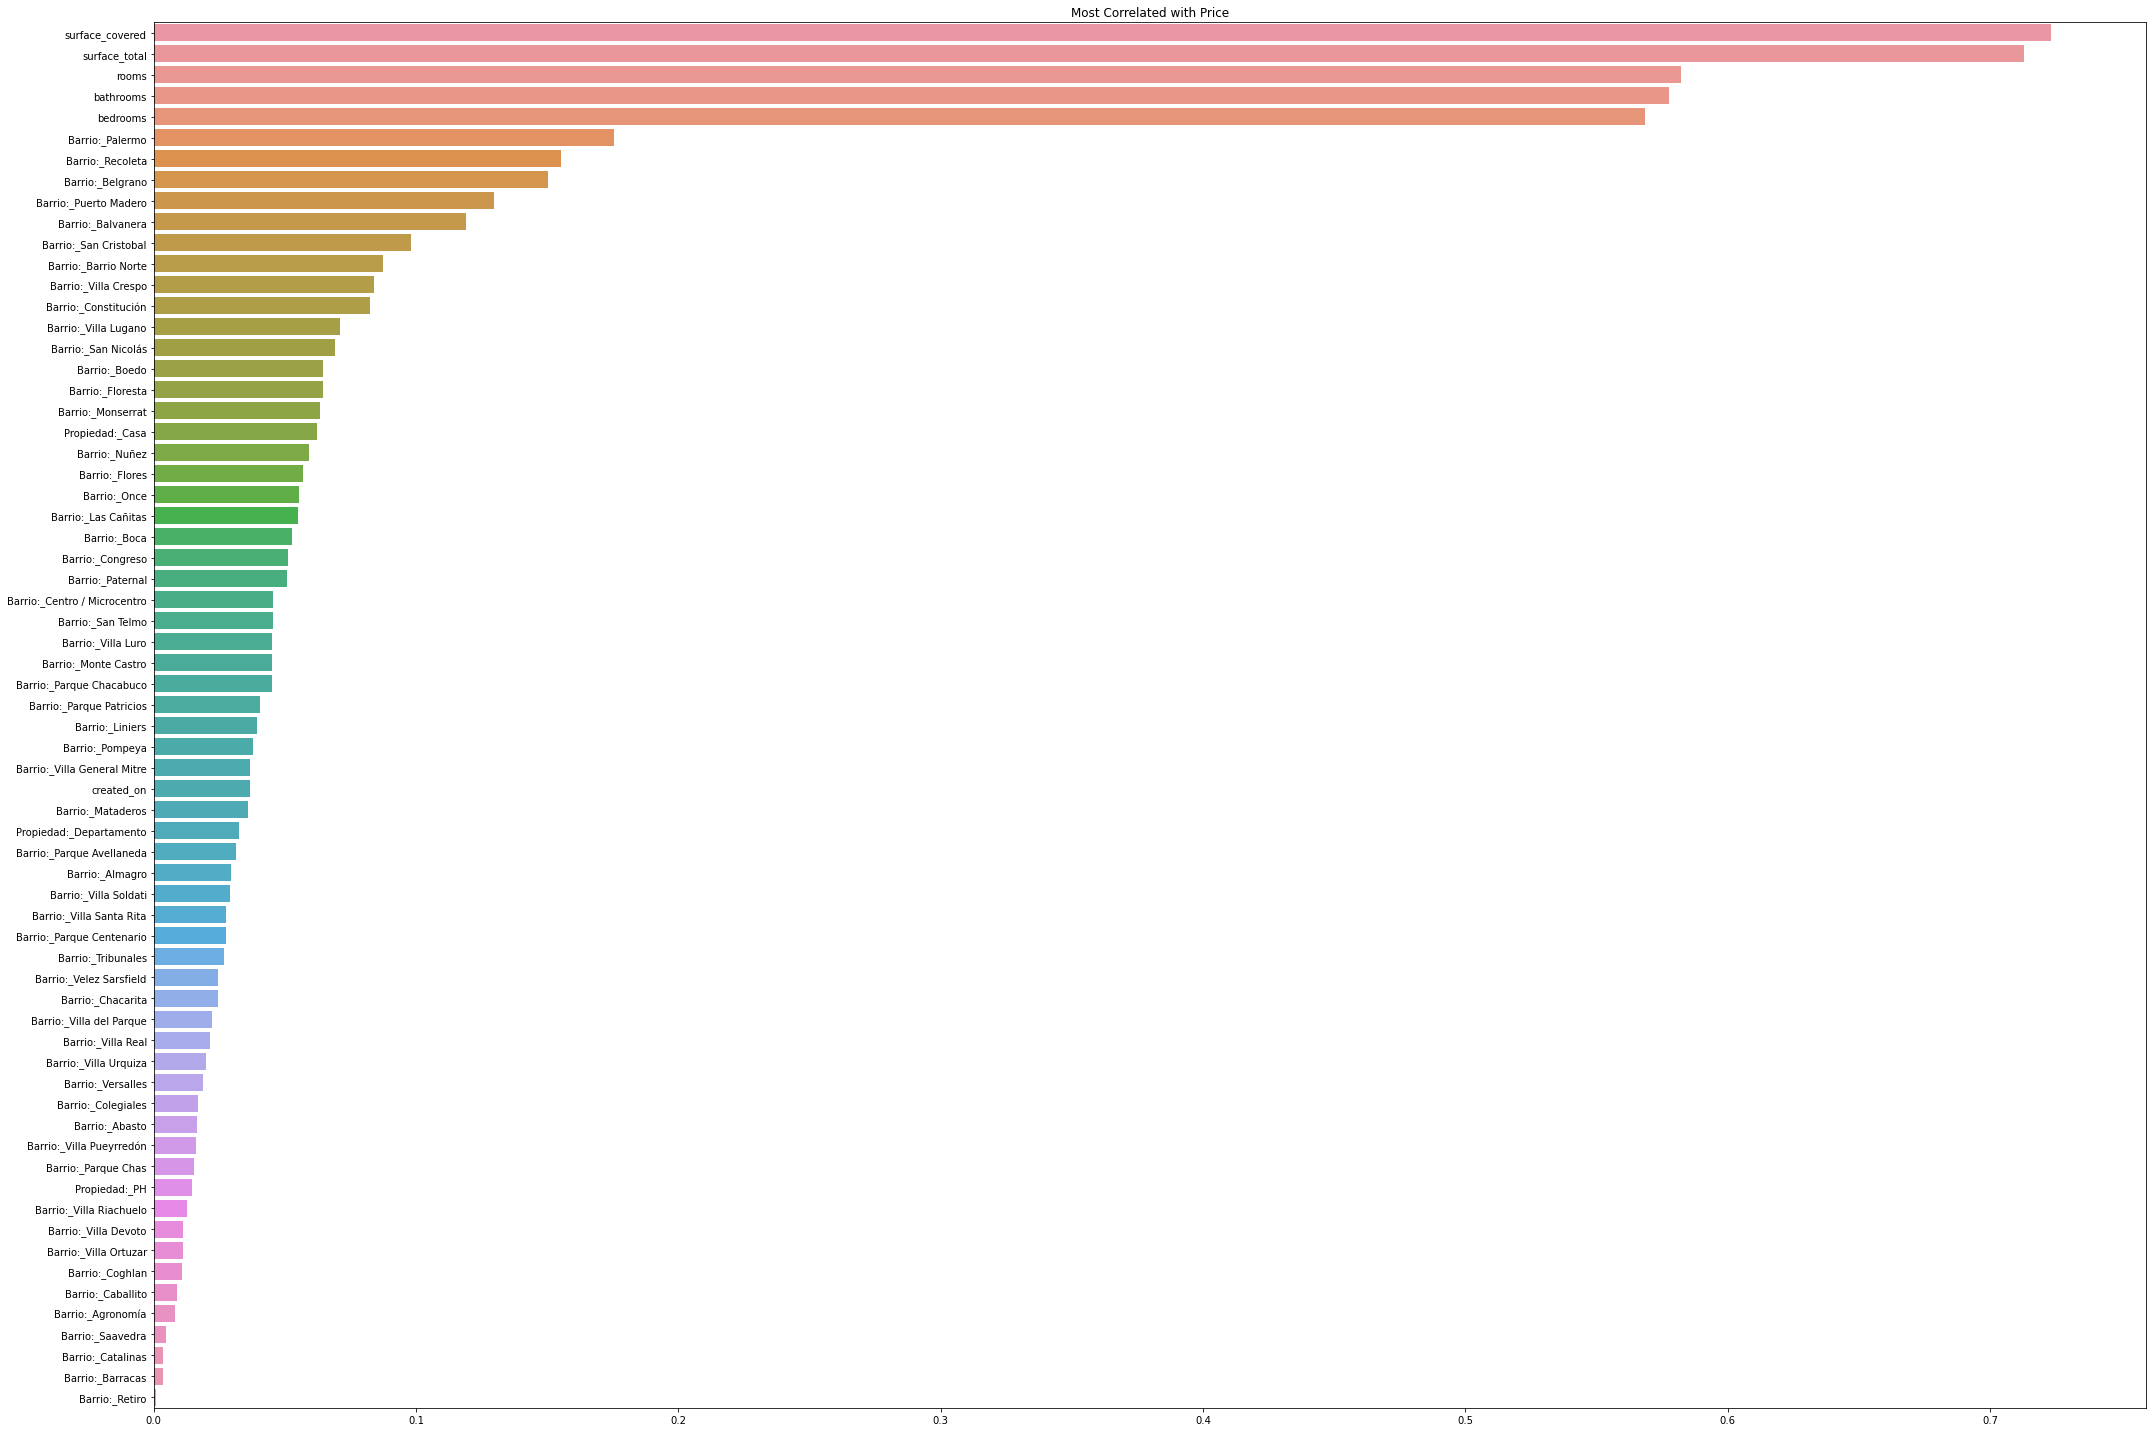

In [90]:
plt.figure(figsize = (30,20))
correlations =file_caba.corr().abs()['price'].sort_values(ascending=False)[1:]
ax = sns.barplot(x=correlations.values,y=correlations.index).set_title('Most Correlated with Price')
plt.tight_layout()

# Entrenamiento del Modelo

* Elimino **created_on** ya que vimos que no nos va ser útil y **price** que es lo que intentamos predecir.

In [91]:
X = file_caba.drop(['price', 'created_on'], axis=1)
y = file_caba.price

print(X.shape)
print(y.shape)

(71775, 65)
(71775,)


### PCA
* Uso PCA debido a la cantidad de columnas que tenemos.

In [92]:
# pca - tome el 90% variación
pca = PCA(0.9)
# Usando 'mle' para adivinar la dimensión
# pca = PCA(n_components='mle', svd_solver="full")
X_nuevo = pca.fit_transform(X)
X_nuevo.shape

(71775, 32)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.3, random_state=42)

* Antes de empezar a entrenar nuestros modelos, quiero hacer una observación aquí. En el Proyecto N°2 he usado la métrica de RMSE (Raíz medio del error cuadrático medio). Por recomendación del mentor y de varios colegas, voy a implementar los mismos modelos pero en esta ocasión voy a sacar el SMAPE (Error porcentual de la media absoluta simétrica). Mientras más bajo sea este error porcentual, sería un mejor modelo para nuestro objetivo principal.

In [94]:
# Función SMAPE
def sym_mean_absolute_percentage_error(y_true, y_pred):
  eps = 1e-7
  return np.mean(np.abs((y_true - y_pred) / (y_true + y_pred + eps))) * 100

### Random Forest

In [95]:
randF = RandomForestRegressor(max_depth=14, random_state=30)
randF.fit(X_train, y_train)

y_train_pred = randF.predict(X_train)
y_test_pred = randF.predict(X_test)

#Evaluamos el modelo y su hiperparámetro escogido
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

#Evaluamos el SMAPE
SMAPE_train = sym_mean_absolute_percentage_error(y_train, y_train_pred)
SMAPE_test = sym_mean_absolute_percentage_error(y_test, y_test_pred)


print("% de no tener error en la predicción en el conjunto de entrenamiento es de:", round(r2_train, 3) * 100,"%")
print("% de no tener error en la predicción en el conjunto de testeo es de:", round(r2_test, 3)*100, "%")
print("% SMAPE en el conjunto de entrenamiento es de:", round(SMAPE_train,2),"%")
print("% SMAPE en el conjunto de test es de:", round(SMAPE_test,2),"%")

% de no tener error en la predicción en el conjunto de entrenamiento es de: 90.0 %
% de no tener error en la predicción en el conjunto de testeo es de: 83.2 %
% SMAPE en el conjunto de entrenamiento es de: 5.45 %
% SMAPE en el conjunto de test es de: 6.54 %


In [96]:
results = cross_validate(randF, X_train, y_train, cv=5, return_train_score=True, scoring='r2', n_jobs=-1)
print('Mean r2 test: ', np.mean(results['test_score']))

Mean r2 test:  0.8299738807778698


## XGBOOST
* **RMSE**
* Modelo que entrenamos en el Proyecto N°2, veamos si mejora.

In [97]:
xgbr = xgb.XGBRegressor()

In [98]:
parameters = {"max_depth":[5,10,15,20], "n_estimators":[15,20,30,35,40]}

In [99]:
model = GridSearchCV(xgbr, parameters)

In [100]:
model.fit(X_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [101]:
model.best_params_

{'max_depth': 15, 'n_estimators': 40}

In [102]:
importance_tree = model.best_estimator_.feature_importances_
for i,v in enumerate(importance_tree):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03134
Feature: 1, Score: 0.27261
Feature: 2, Score: 0.07727
Feature: 3, Score: 0.01779
Feature: 4, Score: 0.00583
Feature: 5, Score: 0.03207
Feature: 6, Score: 0.00751
Feature: 7, Score: 0.01045
Feature: 8, Score: 0.08668
Feature: 9, Score: 0.03005
Feature: 10, Score: 0.03110
Feature: 11, Score: 0.01675
Feature: 12, Score: 0.02019
Feature: 13, Score: 0.00807
Feature: 14, Score: 0.00983
Feature: 15, Score: 0.02427
Feature: 16, Score: 0.01399
Feature: 17, Score: 0.01488
Feature: 18, Score: 0.03259
Feature: 19, Score: 0.01405
Feature: 20, Score: 0.01512
Feature: 21, Score: 0.03150
Feature: 22, Score: 0.01271
Feature: 23, Score: 0.01836
Feature: 24, Score: 0.04556
Feature: 25, Score: 0.02378
Feature: 26, Score: 0.01707
Feature: 27, Score: 0.00998
Feature: 28, Score: 0.02802
Feature: 29, Score: 0.01142
Feature: 30, Score: 0.00856
Feature: 31, Score: 0.02063


In [103]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

18427.803120328786
31530.684935861333


In [104]:
# Evaluamos mediante el error cuadratico medio para comparar resultados
rmse_train= np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test= np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en train Xgboost {rmse_train.round(2)}')
print(f'Raíz del error cuadrático medio en Test Xgboost: {rmse_test.round(2)}')

Raíz del error cuadrático medio en train Xgboost 18427.8
Raíz del error cuadrático medio en Test Xgboost: 31530.68


Raíz del error cuadrático medio en Train: 18427.803120328786
Raíz del error cuadrático medio en Test: 31530.684935861333


C:\Users\Matias\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Matias\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



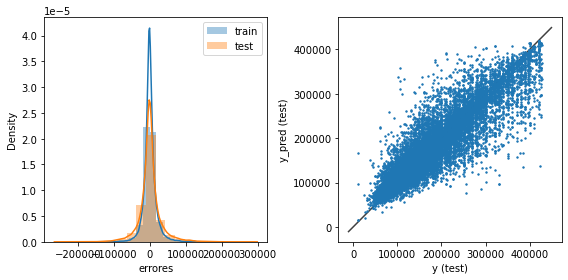

In [105]:
#  análisis del error de los modelos
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

**SMAPE**

In [106]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", max_depth=20, random_state=30)
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

#Evaluamos el modelo y su hiperparámetro escogido
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

#Evaluamos el SMAPE
SMAPE_train = sym_mean_absolute_percentage_error(y_train, y_train_pred)
SMAPE_test = sym_mean_absolute_percentage_error(y_test, y_test_pred)


print("% de no tener error en la predicción en el conjunto de entrenamiento es de:", round(r2_train, 3) * 100,"%")
print("% de no tener error en la predicción en el conjunto de testeo es de:", round(r2_test, 3)*100, "%")

print("% SMAPE en el conjunto de entrenamiento es de:", round(SMAPE_train,2),"%")
print("% SMAPE en el conjunto de test es de:", round(SMAPE_test,2),"%")

[16:13:26] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
% de no tener error en la predicción en el conjunto de entrenamiento es de: 96.0 %
% de no tener error en la predicción en el conjunto de testeo es de: 84.0 %
% SMAPE en el conjunto de entrenamiento es de: 2.66 %
% SMAPE en el conjunto de test es de: 5.54 %


### Lightgbm 

In [107]:
gbm = lgb.LGBMRegressor(max_depth=20)
gbm.fit(X_train, y_train)

y_train_pred = gbm.predict(X_train)
y_test_pred = gbm.predict(X_test)

#Evaluamos el modelo y su hiperparámetro escogido
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


#Evaluamos el SMAPE
SMAPE_train = sym_mean_absolute_percentage_error(y_train, y_train_pred)
SMAPE_test = sym_mean_absolute_percentage_error(y_test, y_test_pred)


print("% de no tener error en la predicción en el conjunto de entrenamiento es de:", round(r2_train, 3) * 100,"%")
print("% de no tener error en la predicción en el conjunto de testeo es de:", round(r2_test, 3)*100, "%")
print("% SMAPE en el conjunto de entrenamiento es de:", round(SMAPE_train,2),"%")
print("% SMAPE en el conjuntoS de test es de:", round(SMAPE_test,2),"%")

% de no tener error en la predicción en el conjunto de entrenamiento es de: 81.39999999999999 %
% de no tener error en la predicción en el conjunto de testeo es de: 79.3 %
% SMAPE en el conjunto de entrenamiento es de: 7.42 %
% SMAPE en el conjuntoS de test es de: 7.69 %



### Elección de modelo Parte B
Finalmente, para este modelo escogería XGBoost, ya que tiene un R2 de 84% y un SMAPE de un 5.5%. Osea el error medio absoluto es bastante bajo y dado esto sería el mejor modelo a seleccionar. 

# Interpretación del Modelo

* Creo que el modelo con menos probabilidad de error es el modelo de xgboost con SMAPE.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", max_depth=15, metricrandom_state=30)
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

#Evaluamos el modelo y su hiperparámetro escogido
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

#Evaluamos el SMAPE
SMAPE_train = sym_mean_absolute_percentage_error(y_train, y_train_pred)
SMAPE_test = sym_mean_absolute_percentage_error(y_test, y_test_pred)


print("% de no tener error en la predicción en el conjunto de entrenamiento es de:", round(r2_train, 3) * 100,"%")
print("% de no tener error en la predicción en el conjunto de testeo es de:", round(r2_test, 3)*100, "%")
print("% SMAPE en el conjunto de entrenamiento es de:", round(SMAPE_train,2),"%")
print("% SMAPE en el conjunto de test es de:", round(SMAPE_test,2),"%")

[16:13:55] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:13:55] WARNING: ..\src\learner.cc:541: 
Parameters: { metricrandom_state } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


% de no tener error en la predicción en el conjunto de entrenamiento es de: 95.0 %
% de no tener error en la predicción en el conjunto de testeo es de: 85.0 %
% SMAPE en el conjunto de entrenamiento es de: 3.38 %
% SMAPE en el conjunto de test es de: 5.6 %


<AxesSubplot:title={'center':'XGBoost top 10 Feature Importance'}, xlabel='F score', ylabel='Features'>

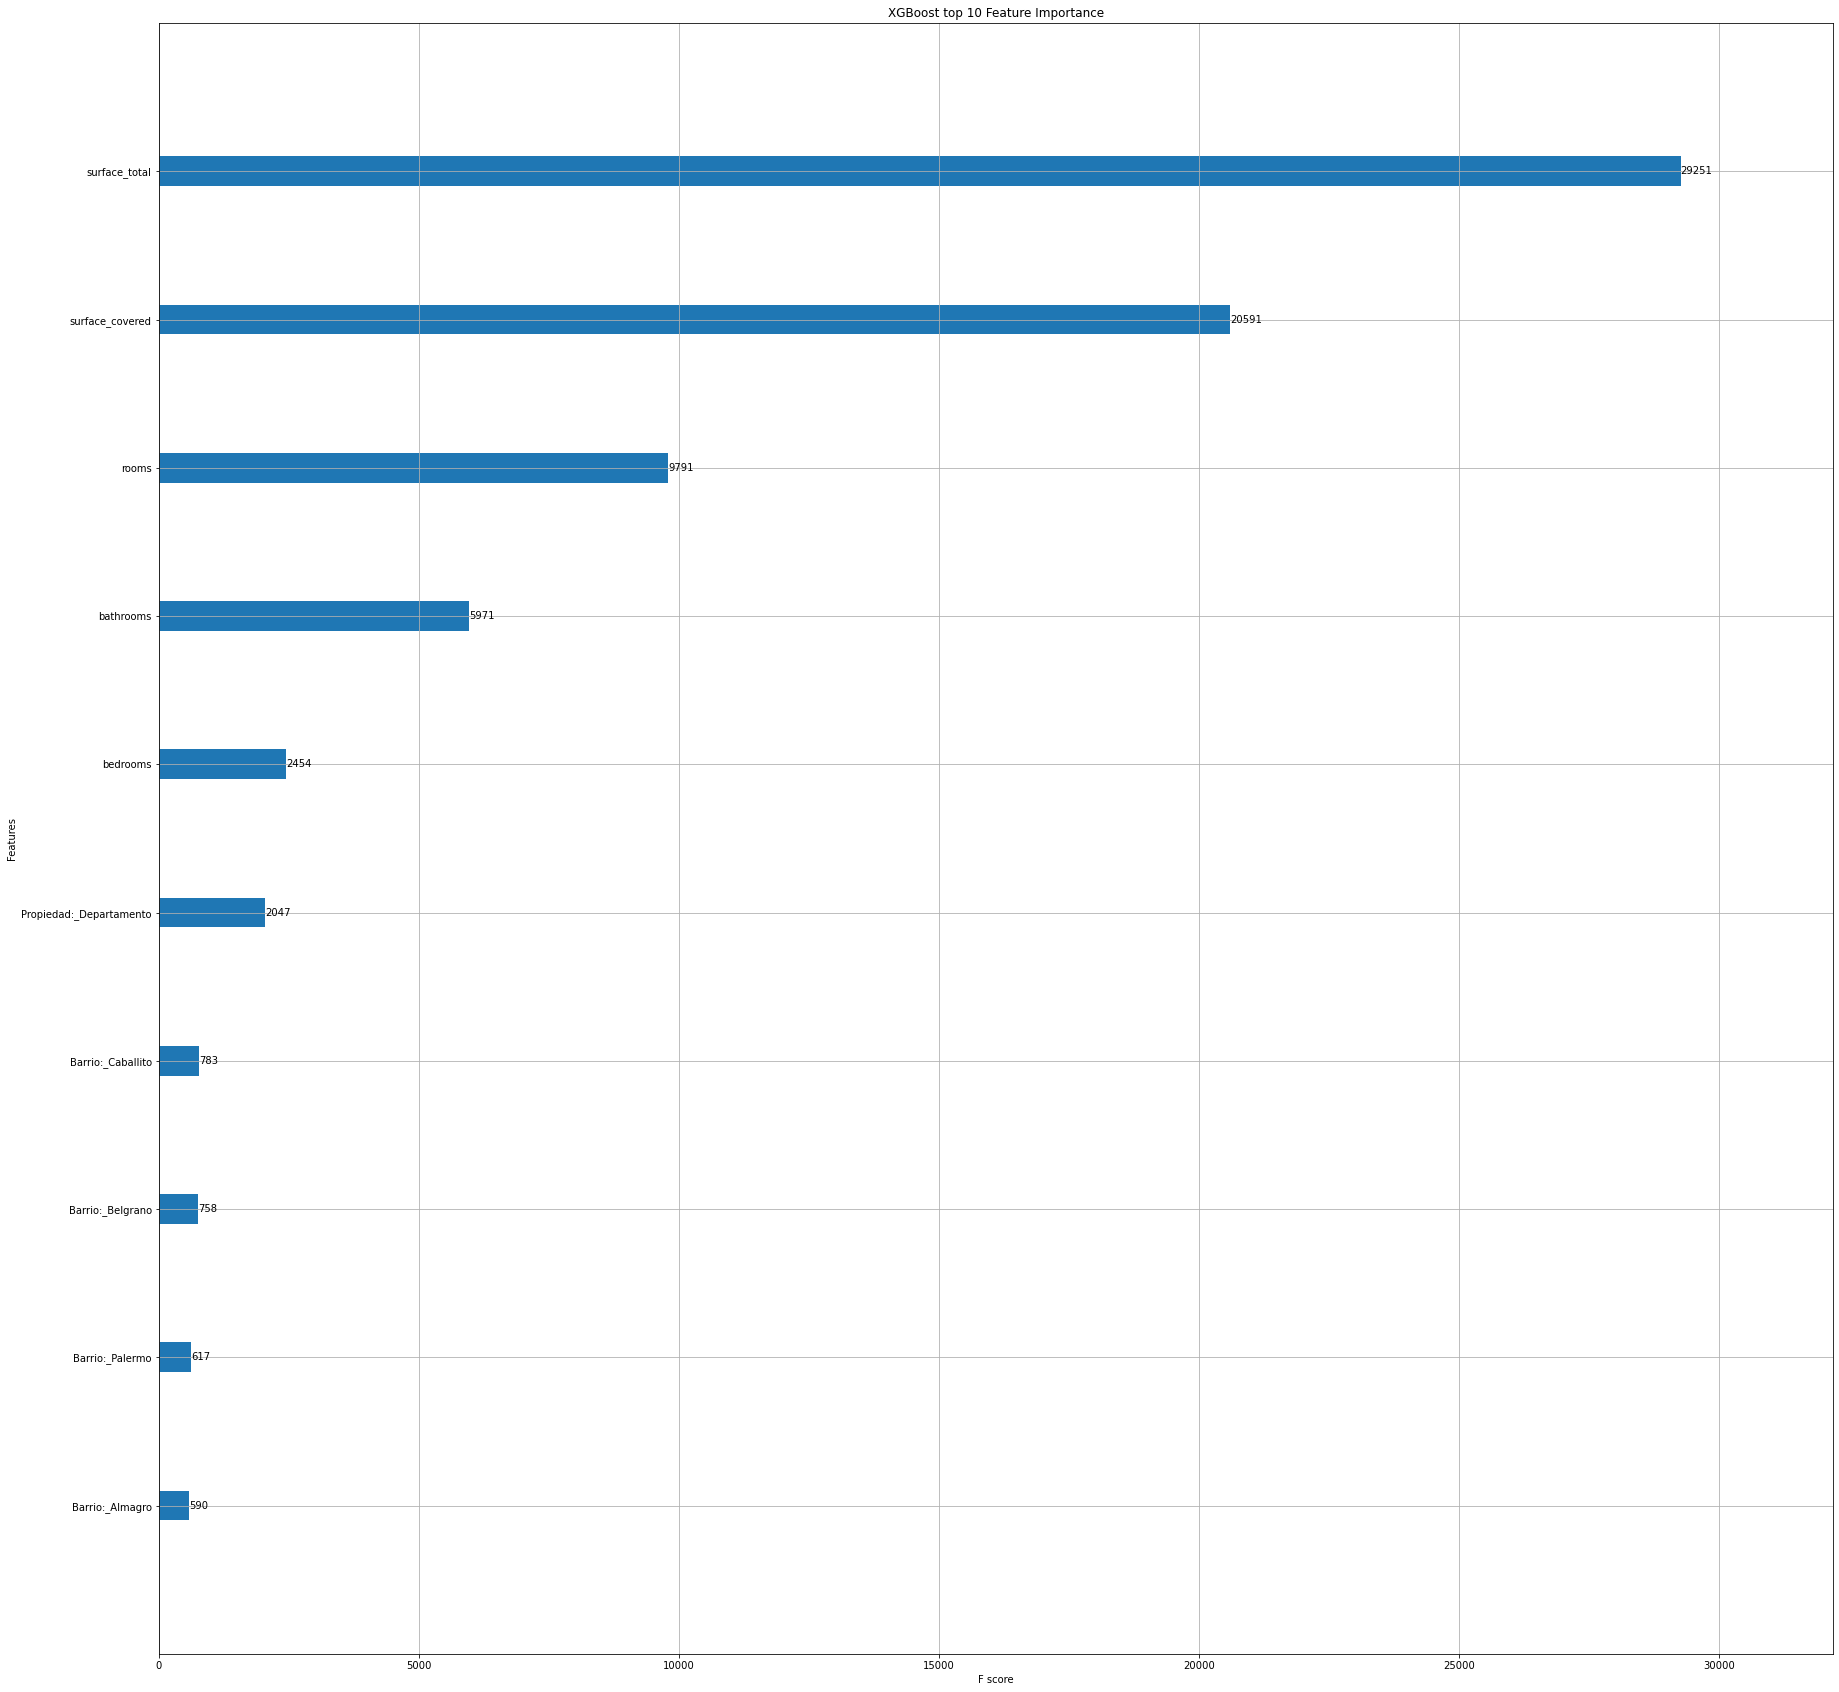

In [110]:
#feature importance

fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_importance(xgb_model, ax=ax, max_num_features=10, title="XGBoost top 10 Feature Importance")

# Conclusión

* La principal diferencia de este último proyecto respeto al Proyecto N° 2 fue indagar muchísimo más a fondo la primera parte. El análisis exploratorio de datos entiendo que es sumamente importante para nuestro proyecto, ya que aquí vamos a entender nuestro dataset para luego realizar las transformaciones correspondientes. Creo que en esta oportunidad pude mejorarlo y entenderlo mejor y estoy convencido que esta mejora afectó al aprendizaje del modelo, disminuyendo el error. 
* Aún así, creo que todavía estamos lejos para decir que este modelo podría ser usado en la inmobiliaria Properti por ejemplo, ya que el porcentaje de error, si bien lo mejoramos, sigue siendo bastante elevado para que sea usado en la practica. De todas formas estoy muy feliz y conforme de todo lo aprendido en este último sprint.
* Otro dato curioso a destacar despecto al modelo anterior, es que la variable de cantidad de habitaciones de nuestra propiedad antes no tenía demasiada importancia, mientras que en este modelo desarrollado vemos que sí es importante junto con la superficie cubierta y total, lo cual creo que van de la mano. 
